In [2]:
import pandas as pd
import datetime
import numpy as np

import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import jupyter_dash
from dash.dependencies import Input, Output
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from IPython.display import display

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

In [3]:
# pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [4]:
# with pd.option_context('display.max_rows', 400, 'display.max_columns', 50):
#     display(df.tail(5))

# Fitbit Data

In [5]:
steps_df = pd.read_csv('data/steps.csv')
steps_df

Date  Step Count
0     2020-01-01        1041
1     2020-01-02         321
2     2020-01-03        1659
3     2020-01-04        8407
4     2020-01-05        4520
...          ...         ...
1161  2023-03-07        4960
1162  2023-03-08         358
1163  2023-03-09         749
1164  2023-03-10        3203
1165  2023-03-11        8643

[1166 rows x 2 columns]

In [6]:
resting_hr_df = pd.read_csv('data/resting_hr.csv')
resting_hr_df

Date  resting_HR
0     2020-01-01        56.0
1     2020-01-02        58.0
2     2020-01-03        57.0
3     2020-01-04        58.0
4     2020-01-05        57.0
...          ...         ...
1161  2023-03-07        55.0
1162  2023-03-08        53.0
1163  2023-03-09        54.0
1164  2023-03-10        53.0
1165  2023-03-11        55.0

[1166 rows x 2 columns]

In [7]:
floors_df = pd.read_csv('data/floors.csv')
floors_df

Date  Number of Floors
0     2020-01-01                 0
1     2020-01-02                 0
2     2020-01-03                 1
3     2020-01-04                 8
4     2020-01-05                 2
...          ...               ...
1161  2023-03-07                 8
1162  2023-03-08                 0
1163  2023-03-09                 0
1164  2023-03-10                 1
1165  2023-03-11                 5

[1166 rows x 2 columns]

In [8]:
df = pd.merge(steps_df, resting_hr_df)
df

Date  Step Count  resting_HR
0     2020-01-01        1041        56.0
1     2020-01-02         321        58.0
2     2020-01-03        1659        57.0
3     2020-01-04        8407        58.0
4     2020-01-05        4520        57.0
...          ...         ...         ...
1161  2023-03-07        4960        55.0
1162  2023-03-08         358        53.0
1163  2023-03-09         749        54.0
1164  2023-03-10        3203        53.0
1165  2023-03-11        8643        55.0

[1166 rows x 3 columns]

In [9]:
df = pd.merge(df, floors_df)
df

Date  Step Count  resting_HR  Number of Floors
0     2020-01-01        1041        56.0                 0
1     2020-01-02         321        58.0                 0
2     2020-01-03        1659        57.0                 1
3     2020-01-04        8407        58.0                 8
4     2020-01-05        4520        57.0                 2
...          ...         ...         ...               ...
1161  2023-03-07        4960        55.0                 8
1162  2023-03-08         358        53.0                 0
1163  2023-03-09         749        54.0                 0
1164  2023-03-10        3203        53.0                 1
1165  2023-03-11        8643        55.0                 5

[1166 rows x 4 columns]

# Fitbit Heart Rate Data

In [10]:
fitbit_hr_describe_df = pd.read_csv('data/hr_describe_2020-present.csv')
fitbit_hr_describe_df

Date  Heart Rate Count  Heart Rate Mean  Heart Rate STD  \
0     2020-01-01            1349.0        61.689400        7.496629   
1     2020-01-02            1421.0        61.500352        7.566385   
2     2020-01-03            1298.0        63.006934       10.599273   
3     2020-01-04            1390.0        66.987050       10.906427   
4     2020-01-05            1407.0        64.260128        9.231062   
...          ...               ...              ...             ...   
1181  2023-03-27            1404.0        66.323362       14.589249   
1182  2023-03-28            1390.0        64.802878       13.133254   
1183  2023-03-29            1404.0        59.169516        8.418392   
1184  2023-03-30            1410.0        62.871631       13.200312   
1185  2023-03-31            1364.0        66.076246        9.841744   

      Heart Rate Minimum  Heart Rate 25%  Heart Rate Median  Heart Rate 75%  \
0                   46.0            57.0               60.0            65.0   
1                   39.0            56.0               61.0            66.0   
2                   48.0            54.0               62.0            70.0   
3                   53.0            60.0               64.0            71.0   
4                   51.0            58.0               62.0            68.0   
...                  ...             ...                ...             ...   
1181                46.0            55.0               62.5            75.0   
1182                45.0            53.0               62.0            75.0   
1183                43.0            52.0               58.0            65.0   
1184                44.0            52.0               58.0            73.0   
1185                49.0            57.0               66.0            74.0   

      Heart Rate Maximum  
0                   98.0  
1                  102.0  
2                  135.0  
3                  126.0  
4                  118.0  
...                  ...  
1181               121.0  
1182               112.0  
1183                96.0  
1184               101.0  
1185                93.0  

[1186 rows x 9 columns]

In [11]:
df = pd.merge(df, fitbit_hr_describe_df)
df

Date  Step Count  resting_HR  Number of Floors  Heart Rate Count  \
0     2020-01-01        1041        56.0                 0            1349.0   
1     2020-01-02         321        58.0                 0            1421.0   
2     2020-01-03        1659        57.0                 1            1298.0   
3     2020-01-04        8407        58.0                 8            1390.0   
4     2020-01-05        4520        57.0                 2            1407.0   
...          ...         ...         ...               ...               ...   
1161  2023-03-07        4960        55.0                 8            1419.0   
1162  2023-03-08         358        53.0                 0            1407.0   
1163  2023-03-09         749        54.0                 0            1440.0   
1164  2023-03-10        3203        53.0                 1            1390.0   
1165  2023-03-11        8643        55.0                 5            1407.0   

      Heart Rate Mean  Heart Rate STD  Heart Rate Minimum  Heart Rate 25%  \
0           61.689400        7.496629                46.0            57.0   
1           61.500352        7.566385                39.0            56.0   
2           63.006934       10.599273                48.0            54.0   
3           66.987050       10.906427                53.0            60.0   
4           64.260128        9.231062                51.0            58.0   
...               ...             ...                 ...             ...   
1161        71.594785        9.812272                50.0            66.0   
1162        57.001421       10.917119                43.0            49.0   
1163        62.082639        8.746971                48.0            56.0   
1164        60.641727       17.659804                44.0            48.0   
1165        73.628998       15.222866                48.0            61.0   

      Heart Rate Median  Heart Rate 75%  Heart Rate Maximum  
0                  60.0            65.0                98.0  
1                  61.0            66.0               102.0  
2                  62.0            70.0               135.0  
3                  64.0            71.0               126.0  
4                  62.0            68.0               118.0  
...                 ...             ...                 ...  
1161               70.0            75.0               125.0  
1162               52.0            63.0               103.0  
1163               60.0            67.0               104.0  
1164               52.0            68.0               120.0  
1165               71.0            83.0               134.0  

[1166 rows x 12 columns]

In [12]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.asfreq.html#pandas.DataFrame.asfreq
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df = df.resample('D', convention='start').asfreq()
df = df.reset_index()
df = df.rename(columns={"resting_HR":"Resting Heart Rate"})
df

Date  Step Count  Resting Heart Rate  Number of Floors  \
0    2020-01-01        1041                56.0                 0   
1    2020-01-02         321                58.0                 0   
2    2020-01-03        1659                57.0                 1   
3    2020-01-04        8407                58.0                 8   
4    2020-01-05        4520                57.0                 2   
...         ...         ...                 ...               ...   
1161 2023-03-07        4960                55.0                 8   
1162 2023-03-08         358                53.0                 0   
1163 2023-03-09         749                54.0                 0   
1164 2023-03-10        3203                53.0                 1   
1165 2023-03-11        8643                55.0                 5   

      Heart Rate Count  Heart Rate Mean  Heart Rate STD  Heart Rate Minimum  \
0               1349.0        61.689400        7.496629                46.0   
1               1421.0        61.500352        7.566385                39.0   
2               1298.0        63.006934       10.599273                48.0   
3               1390.0        66.987050       10.906427                53.0   
4               1407.0        64.260128        9.231062                51.0   
...                ...              ...             ...                 ...   
1161            1419.0        71.594785        9.812272                50.0   
1162            1407.0        57.001421       10.917119                43.0   
1163            1440.0        62.082639        8.746971                48.0   
1164            1390.0        60.641727       17.659804                44.0   
1165            1407.0        73.628998       15.222866                48.0   

      Heart Rate 25%  Heart Rate Median  Heart Rate 75%  Heart Rate Maximum  
0               57.0               60.0            65.0                98.0  
1               56.0               61.0            66.0               102.0  
2               54.0               62.0            70.0               135.0  
3               60.0               64.0            71.0               126.0  
4               58.0               62.0            68.0               118.0  
...              ...                ...             ...                 ...  
1161            66.0               70.0            75.0               125.0  
1162            49.0               52.0            63.0               103.0  
1163            56.0               60.0            67.0               104.0  
1164            48.0               52.0            68.0               120.0  
1165            61.0               71.0            83.0               134.0  

[1166 rows x 12 columns]

In [13]:
# any dates missing?
start = '2020-01-01'
end = '2023-03-11'
pd.date_range(start=start, end=end).difference(df['Date'])

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

# Mood Data

In [14]:
mood_df1 = pd.read_csv('data/mood_2020-2021.csv')
mood_df1

Date            Timestamp  Mood  Pain  Tired  Sick  Anxiousness  \
0    2019-12-24  12/24/2019 19:10:25   2.0   1.0    1.0   0.0          0.0   
1    2019-12-25  12/25/2019 23:18:50   1.0   0.0    1.0   0.0          0.0   
2    2019-12-26  12/26/2019 19:33:27   1.0   1.0    1.0   0.0          0.0   
3    2019-12-27  12/27/2019 19:28:08   1.0   0.0    0.0   0.0          0.0   
4    2019-12-28  12/28/2019 19:11:15   1.0   1.0    1.0   0.0          0.0   
..          ...                  ...   ...   ...    ...   ...          ...   
369  2020-12-27  12/27/2020 23:27:59   2.0   0.0    0.0   0.0          0.0   
370  2020-12-28  12/28/2020 19:11:28   2.0   0.0    1.0   0.0          0.0   
371  2020-12-29  12/29/2020 23:59:59   2.0   0.0    1.0   0.0          0.0   
372  2020-12-30  12/30/2020 18:57:42   2.0   1.0    1.0   0.0          0.0   
373  2020-12-31  12/31/2020 18:58:34   2.0   0.0    1.0   0.0          0.0   

     Depressed  Suicidal  Self-Harm  Thoughts of Death  Repetitive Thoughts  \
0          0.0       0.0        0.0                0.0                  0.0   
1          0.0       0.0        0.0                0.0                  0.0   
2          0.0       0.0        0.0                0.0                  0.0   
3          0.0       0.0        0.0                0.0                  0.0   
4          0.0       0.0        0.0                1.0                  0.0   
..         ...       ...        ...                ...                  ...   
369        0.0       0.0        0.0                0.0                  0.0   
370        0.0       0.0        0.0                0.0                  0.0   
371        0.0       0.0        0.0                0.0                  0.0   
372        0.0       0.0        0.0                0.0                  0.0   
373        0.0       0.0        0.0                0.0                  0.0   

     Thoughts of Worthlessness  Thoughts of Hopelessness  Brain Sludge  \
0                          0.0                       0.0           0.0   
1                          0.0                       0.0           0.0   
2                          0.0                       0.0           0.0   
3                          0.0                       0.0           0.0   
4                          0.0                       0.0           0.0   
..                         ...                       ...           ...   
369                        0.0                       0.0           0.0   
370                        0.0                       0.0           0.0   
371                        0.0                       0.0           0.0   
372                        0.0                       0.0           0.0   
373                        0.0                       0.0           0.0   

     Sluggish  Restless  Existential Crisis  Loss of Interest  Self Isolation  \
0         0.0       0.0                 0.0               0.0             0.0   
1         0.0       0.0                 0.0               0.0             0.0   
2         0.0       0.0                 0.0               0.0             0.0   
3         0.0       0.0                 0.0               0.0             0.0   
4         0.0       0.0                 0.0               0.0             0.0   
..        ...       ...                 ...               ...             ...   
369       0.0       0.0                 0.0               0.0             0.0   
370       0.0       0.0                 0.0               0.0             0.0   
371       0.0       0.0                 0.0               0.0             0.0   
372       0.0       1.0                 0.0               0.0             0.0   
373       0.0       0.0                 0.0               0.0             0.0   

     Paranoia  Elevated  Irritable/Angry  Loneliness  Libido Notes  Weight  
0         0.0       0.0              0.0         0.0     1.0   NaN     NaN  
1         0.0       0.0              0.0         0.0     1.0   NaN     NaN  
2         0.0       0.0         

In [15]:
mood_df1.isna().mean() * 100

Date                          0.000000
Timestamp                     1.871658
Mood                          1.871658
Pain                          1.871658
Tired                         1.871658
Sick                          1.871658
Anxiousness                   1.871658
Depressed                     1.871658
Suicidal                      1.871658
Self-Harm                     1.871658
Thoughts of Death             1.871658
Repetitive Thoughts           1.871658
Thoughts of Worthlessness     1.871658
Thoughts of Hopelessness      1.871658
Brain Sludge                  1.871658
Sluggish                      1.871658
Restless                      1.871658
Existential Crisis            1.871658
Loss of Interest              1.871658
Self Isolation                1.871658
Paranoia                      1.871658
Elevated                      1.871658
Irritable/Angry               1.871658
Loneliness                    1.871658
Libido                        1.871658
Notes                    

In [16]:
# any dates missing?
start = '2020-01-01'
end = '2020-12-31'
pd.date_range(start=start, end=end).difference(mood_df1['Date'])

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [17]:
mood_df2 = pd.read_csv('data/mood_2021-present.csv')
mood_df2

Date           Timestamp  Mood  Pain Pain Location  Tired  Sick  \
0    2021-01-01   1/1/2021 19:15:28   2.0   1.0           NaN    1.0   0.0   
1    2021-01-02   1/2/2021 19:57:13   2.0   1.0           NaN    1.0   0.0   
2    2021-01-03   1/3/2021 19:17:42   2.0   0.0           NaN    1.0   0.0   
3    2021-01-04   1/4/2021 23:59:59   2.0   0.0           NaN    1.0   0.0   
4    2021-01-05   1/5/2021 18:56:50   2.0   0.0           NaN    1.0   0.0   
..          ...                 ...   ...   ...           ...    ...   ...   
795  2023-03-07   3/7/2023 18:46:09   2.0   0.0           NaN    0.0   0.0   
796  2023-03-08   3/8/2023 18:42:18   2.0   0.0           NaN    0.0   0.0   
797  2023-03-09   3/9/2023 19:14:30   2.0   0.0           NaN    1.0   0.0   
798  2023-03-10  3/10/2023 19:00:52   2.0   0.0           NaN    0.0   0.0   
799  2023-03-11  3/11/2023 18:55:42   2.0   0.0           NaN    0.0   0.0   

     Anxiousness  Depressed  Suicidal  Self-Harm  Thoughts of Death  \
0            0.0        0.0       0.0        0.0                0.0   
1            0.0        0.0       0.0        0.0                0.0   
2            0.0        0.0       0.0        0.0                0.0   
3            0.0        0.0       0.0        0.0                0.0   
4            0.0        0.0       0.0        0.0                0.0   
..           ...        ...       ...        ...                ...   
795          0.0        0.0       0.0        0.0                0.0   
796          0.0        0.0       0.0        0.0                0.0   
797          0.0        0.0       0.0        0.0                0.0   
798          0.0        0.0       0.0        0.0                0.0   
799          0.0        0.0       0.0        0.0                0.0   

     Thoughts of Worthlessness  Thoughts of Hopelessness  Repetitive Thoughts  \
0                          0.0                       0.0                  0.0   
1                          0.0                       0.0                  0.0   
2                          0.0                       0.0                  0.0   
3                          0.0                       0.0                  1.0   
4                          0.0                       0.0                  1.0   
..                         ...                       ...                  ...   
795                        0.0                       0.0                  0.0   
796                        0.0                       0.0                  0.0   
797                        0.0                       0.0                  0.0   
798                        0.0                       0.0                  0.0   
799                        0.0                       0.0                  0.0   

     Brain Sludge  Sluggish  Restless  Existential Crisis  Weird  \
0             0.0       0.0       0.0                 0.0    0.0   
1             0.0       0.0       0.0                 0.0    0.0   
2             0.0       0.0       0.0                 0.0    0.0   
3             0.0       0.0       0.0                 0.0    0.0   
4             0.0       0.0       0.0                 0.0    0.0   
..            ...       ...       ...                 ...    ...   
795           0.0       0.0       0.0                 0.0    0.0   
796           0.0       0.0       0.0                 0.0    0.0   
797           0.0       0.0       0.0                 0.0    0.0   
798           0.0       0.0       0.0                 0.0    0.0   
799           0.0       0.0       0.0                 0.0    0.0   

     Loss of Interest  Self Isolation  Paranoia  Elevated  Irritable/Angry  \
0                 0.0             0.0       0.0       0.0              0.0   
1                 0.0             0.0       0.0       0.0              0.0   
2                 0.0             0.0       0.0       0.0              0.0   
3                 0.0             0.0       0.0       0.0              0.0   
4                 0.0             0.0    

In [18]:
mood_df = pd.concat([mood_df1, mood_df2])
mood_df

Date            Timestamp  Mood  Pain  Tired  Sick  Anxiousness  \
0    2019-12-24  12/24/2019 19:10:25   2.0   1.0    1.0   0.0          0.0   
1    2019-12-25  12/25/2019 23:18:50   1.0   0.0    1.0   0.0          0.0   
2    2019-12-26  12/26/2019 19:33:27   1.0   1.0    1.0   0.0          0.0   
3    2019-12-27  12/27/2019 19:28:08   1.0   0.0    0.0   0.0          0.0   
4    2019-12-28  12/28/2019 19:11:15   1.0   1.0    1.0   0.0          0.0   
..          ...                  ...   ...   ...    ...   ...          ...   
795  2023-03-07    3/7/2023 18:46:09   2.0   0.0    0.0   0.0          0.0   
796  2023-03-08    3/8/2023 18:42:18   2.0   0.0    0.0   0.0          0.0   
797  2023-03-09    3/9/2023 19:14:30   2.0   0.0    1.0   0.0          0.0   
798  2023-03-10   3/10/2023 19:00:52   2.0   0.0    0.0   0.0          0.0   
799  2023-03-11   3/11/2023 18:55:42   2.0   0.0    0.0   0.0          0.0   

     Depressed  Suicidal  Self-Harm  Thoughts of Death  Repetitive Thoughts  \
0          0.0       0.0        0.0                0.0                  0.0   
1          0.0       0.0        0.0                0.0                  0.0   
2          0.0       0.0        0.0                0.0                  0.0   
3          0.0       0.0        0.0                0.0                  0.0   
4          0.0       0.0        0.0                1.0                  0.0   
..         ...       ...        ...                ...                  ...   
795        0.0       0.0        0.0                0.0                  0.0   
796        0.0       0.0        0.0                0.0                  0.0   
797        0.0       0.0        0.0                0.0                  0.0   
798        0.0       0.0        0.0                0.0                  0.0   
799        0.0       0.0        0.0                0.0                  0.0   

     Thoughts of Worthlessness  Thoughts of Hopelessness  Brain Sludge  \
0                          0.0                       0.0           0.0   
1                          0.0                       0.0           0.0   
2                          0.0                       0.0           0.0   
3                          0.0                       0.0           0.0   
4                          0.0                       0.0           0.0   
..                         ...                       ...           ...   
795                        0.0                       0.0           0.0   
796                        0.0                       0.0           0.0   
797                        0.0                       0.0           0.0   
798                        0.0                       0.0           0.0   
799                        0.0                       0.0           0.0   

     Sluggish  Restless  Existential Crisis  Loss of Interest  Self Isolation  \
0         0.0       0.0                 0.0               0.0             0.0   
1         0.0       0.0                 0.0               0.0             0.0   
2         0.0       0.0                 0.0               0.0             0.0   
3         0.0       0.0                 0.0               0.0             0.0   
4         0.0       0.0                 0.0               0.0             0.0   
..        ...       ...                 ...               ...             ...   
795       0.0       0.0                 0.0               0.0             0.0   
796       0.0       0.0                 0.0               0.0             0.0   
797       0.0       0.0                 0.0               0.0             0.0   
798       0.0       0.0                 0.0               0.0             0.0   
799       0.0       0.0                 0.0               0.0             0.0   

     Paranoia  Elevated  Irritable/Angry  Loneliness  Libido Notes  Weight  \
0         0.0       0.0              0.0         0.0     1.0   NaN     NaN   
1         0.0       0.0              0.0         0.0     1.0   NaN     NaN   
2         0.0       0.0      

In [19]:
mood_df['Timestamp'] = pd.to_datetime(mood_df['Timestamp'])
mood_df['Date'] = pd.to_datetime(mood_df['Date'])
mood_df

Date           Timestamp  Mood  Pain  Tired  Sick  Anxiousness  \
0   2019-12-24 2019-12-24 19:10:25   2.0   1.0    1.0   0.0          0.0   
1   2019-12-25 2019-12-25 23:18:50   1.0   0.0    1.0   0.0          0.0   
2   2019-12-26 2019-12-26 19:33:27   1.0   1.0    1.0   0.0          0.0   
3   2019-12-27 2019-12-27 19:28:08   1.0   0.0    0.0   0.0          0.0   
4   2019-12-28 2019-12-28 19:11:15   1.0   1.0    1.0   0.0          0.0   
..         ...                 ...   ...   ...    ...   ...          ...   
795 2023-03-07 2023-03-07 18:46:09   2.0   0.0    0.0   0.0          0.0   
796 2023-03-08 2023-03-08 18:42:18   2.0   0.0    0.0   0.0          0.0   
797 2023-03-09 2023-03-09 19:14:30   2.0   0.0    1.0   0.0          0.0   
798 2023-03-10 2023-03-10 19:00:52   2.0   0.0    0.0   0.0          0.0   
799 2023-03-11 2023-03-11 18:55:42   2.0   0.0    0.0   0.0          0.0   

     Depressed  Suicidal  Self-Harm  Thoughts of Death  Repetitive Thoughts  \
0          0.0       0.0        0.0                0.0                  0.0   
1          0.0       0.0        0.0                0.0                  0.0   
2          0.0       0.0        0.0                0.0                  0.0   
3          0.0       0.0        0.0                0.0                  0.0   
4          0.0       0.0        0.0                1.0                  0.0   
..         ...       ...        ...                ...                  ...   
795        0.0       0.0        0.0                0.0                  0.0   
796        0.0       0.0        0.0                0.0                  0.0   
797        0.0       0.0        0.0                0.0                  0.0   
798        0.0       0.0        0.0                0.0                  0.0   
799        0.0       0.0        0.0                0.0                  0.0   

     Thoughts of Worthlessness  Thoughts of Hopelessness  Brain Sludge  \
0                          0.0                       0.0           0.0   
1                          0.0                       0.0           0.0   
2                          0.0                       0.0           0.0   
3                          0.0                       0.0           0.0   
4                          0.0                       0.0           0.0   
..                         ...                       ...           ...   
795                        0.0                       0.0           0.0   
796                        0.0                       0.0           0.0   
797                        0.0                       0.0           0.0   
798                        0.0                       0.0           0.0   
799                        0.0                       0.0           0.0   

     Sluggish  Restless  Existential Crisis  Loss of Interest  Self Isolation  \
0         0.0       0.0                 0.0               0.0             0.0   
1         0.0       0.0                 0.0               0.0             0.0   
2         0.0       0.0                 0.0               0.0             0.0   
3         0.0       0.0                 0.0               0.0             0.0   
4         0.0       0.0                 0.0               0.0             0.0   
..        ...       ...                 ...               ...             ...   
795       0.0       0.0                 0.0               0.0             0.0   
796       0.0       0.0                 0.0               0.0             0.0   
797       0.0       0.0                 0.0               0.0             0.0   
798       0.0       0.0                 0.0               0.0             0.0   
799       0.0       0.0                 0.0               0.0             0.0   

     Paranoia  Elevated  Irritable/Angry  Loneliness  Libido Notes  Weight  \
0         0.0       0.0              0.0         0.0     1.0   NaN     NaN   
1         0.0       0.0              0.0         0.0     1.0   NaN     NaN   
2         0.0       0.0              0.0         0.0

In [20]:
# mood_df.to_csv('data/mood_df.csv', index=None, encoding='utf-8')

In [21]:
# any dates missing?
start = '2020-01-01'
end = '2023-03-11'
pd.date_range(start=start, end=end).difference(mood_df['Date'])

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [22]:
mood_df.isna().mean() * 100

Date                          0.000000
Timestamp                     0.596252
Mood                          0.596252
Pain                          0.596252
Tired                         0.596252
Sick                          0.596252
Anxiousness                   0.596252
Depressed                     0.596252
Suicidal                      0.596252
Self-Harm                     0.596252
Thoughts of Death             0.596252
Repetitive Thoughts           0.596252
Thoughts of Worthlessness     0.596252
Thoughts of Hopelessness      0.596252
Brain Sludge                  0.596252
Sluggish                      0.596252
Restless                      0.596252
Existential Crisis            0.596252
Loss of Interest              0.596252
Self Isolation                0.596252
Paranoia                      0.596252
Elevated                      0.596252
Irritable/Angry               0.596252
Loneliness                    0.596252
Libido                        0.596252
Notes                    

In [23]:
mood_df['Mood'].loc[mood_df['Mood'].isna()]

5     NaN
73    NaN
89    NaN
155   NaN
156   NaN
172   NaN
174   NaN
Name: Mood, dtype: float64

In [24]:
df = pd.merge(df, mood_df)
df

Date  Step Count  Resting Heart Rate  Number of Floors  \
0    2020-01-01        1041                56.0                 0   
1    2020-01-02         321                58.0                 0   
2    2020-01-03        1659                57.0                 1   
3    2020-01-04        8407                58.0                 8   
4    2020-01-05        4520                57.0                 2   
...         ...         ...                 ...               ...   
1161 2023-03-07        4960                55.0                 8   
1162 2023-03-08         358                53.0                 0   
1163 2023-03-09         749                54.0                 0   
1164 2023-03-10        3203                53.0                 1   
1165 2023-03-11        8643                55.0                 5   

      Heart Rate Count  Heart Rate Mean  Heart Rate STD  Heart Rate Minimum  \
0               1349.0        61.689400        7.496629                46.0   
1               1421.0        61.500352        7.566385                39.0   
2               1298.0        63.006934       10.599273                48.0   
3               1390.0        66.987050       10.906427                53.0   
4               1407.0        64.260128        9.231062                51.0   
...                ...              ...             ...                 ...   
1161            1419.0        71.594785        9.812272                50.0   
1162            1407.0        57.001421       10.917119                43.0   
1163            1440.0        62.082639        8.746971                48.0   
1164            1390.0        60.641727       17.659804                44.0   
1165            1407.0        73.628998       15.222866                48.0   

      Heart Rate 25%  Heart Rate Median  Heart Rate 75%  Heart Rate Maximum  \
0               57.0               60.0            65.0                98.0   
1               56.0               61.0            66.0               102.0   
2               54.0               62.0            70.0               135.0   
3               60.0               64.0            71.0               126.0   
4               58.0               62.0            68.0               118.0   
...              ...                ...             ...                 ...   
1161            66.0               70.0            75.0               125.0   
1162            49.0               52.0            63.0               103.0   
1163            56.0               60.0            67.0               104.0   
1164            48.0               52.0            68.0               120.0   
1165            61.0               71.0            83.0               134.0   

               Timestamp  Mood  Pain  Tired  Sick  Anxiousness  Depressed  \
0    2020-01-01 09:05:41   1.0   0.0    0.0   0.0          0.0        0.0   
1    2020-01-02 23:59:59   1.0   0.0    0.0   0.0          0.0        0.0   
2    2020-01-03 23:47:21   2.0   0.0    0.0   0.0          0.0        0.0   
3    2020-01-04 14:35:28   1.0   2.0    1.0   0.0          0.0        0.0   
4    2020-01-05 19:08:20   2.0   2.0    0.0   0.0          0.0        0.0   
...                  ...   ...   ...    ...   ...          ...        ...   
1161 2023-03-07 18:46:09   2.0   0.0    0.0   0.0          0.0        0.0   
1162 2023-03-08 18:42:18   2.0   0.0    0.0   0.0          0.0        0.0   
1163 2023-03-09 19:14:30   2.0   0.0    1.0   0.0          0.0        0.0   
1164 2023-03-10 19:00:52   2.0   0.0    0.0   0.0          0.0        0.0   
1165 2023-03-11 18:55:42   2.0   0.0    0.0   0.0          0.0        0.0   

      Suicidal  Self-Harm  Thoughts of Death  Repetitive Thoughts  \
0          0.0        0.0                0.0                  0.0   
1          0.0        0.0                0.0                  0.0   
2          0.0        0.0                0.0                  0.0   
3          0.0        1.0                0.0                  0.0   
4          0.0

# Time Data

In [25]:
time_df = pd.read_csv('~/qs/time/data/activity_correlations_df.csv')
time_df

Day  sleeping_durations_seconds  sleeping_counts  \
0     2019-12-31                     41503.0              3.0   
1     2020-01-01                     26261.0              2.0   
2     2020-01-02                     55405.0              2.0   
3     2020-01-03                     41466.0              2.0   
4     2020-01-04                     15501.0              1.0   
...          ...                         ...              ...   
1165  2023-03-10                     59984.0              1.0   
1166  2023-03-11                     21918.0              1.0   
1167  2023-03-12                     22703.0              1.0   
1168  2019-12-30                         0.0              0.0   
1169  2023-03-13                         0.0              0.0   

     sleeping_durations  sleeping_durations_seconds_7_day_rolling_mean  \
0              11:31:43                                            0.0   
1              07:17:41                                            0.0   
2              15:23:25                                            0.0   
3              11:31:06                                            0.0   
4              04:18:21                                            0.0   
...                 ...                                            ...   
1165           16:39:44                                        32695.0   
1166           06:05:18                                        32215.0   
1167           06:18:23                                        32220.0   
1168                  0                                            0.0   
1169                  0                                            0.0   

      internet_durations_seconds  internet_counts internet_durations  \
0                        40995.0              7.0           11:23:15   
1                        37528.0              7.0           10:25:28   
2                        29718.0              3.0           08:15:18   
3                        35031.0              4.0           09:43:51   
4                         3816.0              2.0           01:03:36   
...                          ...              ...                ...   
1165                      8750.0              4.0           02:25:50   
1166                     12047.0              3.0           03:20:47   
1167                      6989.0              1.0           01:56:29   
1168                      2149.0              1.0           00:35:49   
1169                         0.0              0.0                  0   

      internet_durations_seconds_7_day_rolling_mean  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
1165                                        26585.0   
1166                                        26575.0   
1167                                        25512.0   
1168                                            0.0   
1169                                            0.0   

      working_durations_seconds  working_counts working_durations  \
0                           0.0             0.0                 0   
1                           0.0             0.0                 0   
2                           0.0             0.0                 0   
3                        2241.0             1.0          00:37:21   
4                       45764.0             2.0          12:42:44   
...                         ...             ...               ...   
1165                    16157.0             1.0          04:29:17   
1166                    43827.0             2.0          12:10:27   
1167                    44016.0             2.0          12:13:36   
1168                        0.0             0.0                 0   
1169                    27441.0             1.0          0

In [26]:
time_df = time_df.rename(columns={"Day": "Date"})
time_df['Date'] = pd.to_datetime(time_df['Date'])
time_df

Date  sleeping_durations_seconds  sleeping_counts  \
0    2019-12-31                     41503.0              3.0   
1    2020-01-01                     26261.0              2.0   
2    2020-01-02                     55405.0              2.0   
3    2020-01-03                     41466.0              2.0   
4    2020-01-04                     15501.0              1.0   
...         ...                         ...              ...   
1165 2023-03-10                     59984.0              1.0   
1166 2023-03-11                     21918.0              1.0   
1167 2023-03-12                     22703.0              1.0   
1168 2019-12-30                         0.0              0.0   
1169 2023-03-13                         0.0              0.0   

     sleeping_durations  sleeping_durations_seconds_7_day_rolling_mean  \
0              11:31:43                                            0.0   
1              07:17:41                                            0.0   
2              15:23:25                                            0.0   
3              11:31:06                                            0.0   
4              04:18:21                                            0.0   
...                 ...                                            ...   
1165           16:39:44                                        32695.0   
1166           06:05:18                                        32215.0   
1167           06:18:23                                        32220.0   
1168                  0                                            0.0   
1169                  0                                            0.0   

      internet_durations_seconds  internet_counts internet_durations  \
0                        40995.0              7.0           11:23:15   
1                        37528.0              7.0           10:25:28   
2                        29718.0              3.0           08:15:18   
3                        35031.0              4.0           09:43:51   
4                         3816.0              2.0           01:03:36   
...                          ...              ...                ...   
1165                      8750.0              4.0           02:25:50   
1166                     12047.0              3.0           03:20:47   
1167                      6989.0              1.0           01:56:29   
1168                      2149.0              1.0           00:35:49   
1169                         0.0              0.0                  0   

      internet_durations_seconds_7_day_rolling_mean  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
1165                                        26585.0   
1166                                        26575.0   
1167                                        25512.0   
1168                                            0.0   
1169                                            0.0   

      working_durations_seconds  working_counts working_durations  \
0                           0.0             0.0                 0   
1                           0.0             0.0                 0   
2                           0.0             0.0                 0   
3                        2241.0             1.0          00:37:21   
4                       45764.0             2.0          12:42:44   
...                         ...             ...               ...   
1165                    16157.0             1.0          04:29:17   
1166                    43827.0             2.0          12:10:27   
1167                    44016.0             2.0          12:13:36   
1168                        0.0             0.0                 0   
1169                    27441.0             1.0          07:37:21   

In [27]:
df = pd.merge(df, time_df)
df

Date  Step Count  Resting Heart Rate  Number of Floors  \
0    2020-01-01        1041                56.0                 0   
1    2020-01-02         321                58.0                 0   
2    2020-01-03        1659                57.0                 1   
3    2020-01-04        8407                58.0                 8   
4    2020-01-05        4520                57.0                 2   
...         ...         ...                 ...               ...   
1161 2023-03-07        4960                55.0                 8   
1162 2023-03-08         358                53.0                 0   
1163 2023-03-09         749                54.0                 0   
1164 2023-03-10        3203                53.0                 1   
1165 2023-03-11        8643                55.0                 5   

      Heart Rate Count  Heart Rate Mean  Heart Rate STD  Heart Rate Minimum  \
0               1349.0        61.689400        7.496629                46.0   
1               1421.0        61.500352        7.566385                39.0   
2               1298.0        63.006934       10.599273                48.0   
3               1390.0        66.987050       10.906427                53.0   
4               1407.0        64.260128        9.231062                51.0   
...                ...              ...             ...                 ...   
1161            1419.0        71.594785        9.812272                50.0   
1162            1407.0        57.001421       10.917119                43.0   
1163            1440.0        62.082639        8.746971                48.0   
1164            1390.0        60.641727       17.659804                44.0   
1165            1407.0        73.628998       15.222866                48.0   

      Heart Rate 25%  Heart Rate Median  Heart Rate 75%  Heart Rate Maximum  \
0               57.0               60.0            65.0                98.0   
1               56.0               61.0            66.0               102.0   
2               54.0               62.0            70.0               135.0   
3               60.0               64.0            71.0               126.0   
4               58.0               62.0            68.0               118.0   
...              ...                ...             ...                 ...   
1161            66.0               70.0            75.0               125.0   
1162            49.0               52.0            63.0               103.0   
1163            56.0               60.0            67.0               104.0   
1164            48.0               52.0            68.0               120.0   
1165            61.0               71.0            83.0               134.0   

               Timestamp  Mood  Pain  Tired  Sick  Anxiousness  Depressed  \
0    2020-01-01 09:05:41   1.0   0.0    0.0   0.0          0.0        0.0   
1    2020-01-02 23:59:59   1.0   0.0    0.0   0.0          0.0        0.0   
2    2020-01-03 23:47:21   2.0   0.0    0.0   0.0          0.0        0.0   
3    2020-01-04 14:35:28   1.0   2.0    1.0   0.0          0.0        0.0   
4    2020-01-05 19:08:20   2.0   2.0    0.0   0.0          0.0        0.0   
...                  ...   ...   ...    ...   ...          ...        ...   
1161 2023-03-07 18:46:09   2.0   0.0    0.0   0.0          0.0        0.0   
1162 2023-03-08 18:42:18   2.0   0.0    0.0   0.0          0.0        0.0   
1163 2023-03-09 19:14:30   2.0   0.0    1.0   0.0          0.0        0.0   
1164 2023-03-10 19:00:52   2.0   0.0    0.0   0.0          0.0        0.0   
1165 2023-03-11 18:55:42   2.0   0.0    0.0   0.0          0.0        0.0   

      Suicidal  Self-Harm  Thoughts of Death  Repetitive Thoughts  \
0          0.0        0.0                0.0                  0.0   
1          0.0        0.0                0.0                  0.0   
2          0.0        0.0                0.0                  0.0   
3          0.0        1.0                0.0                  0.0   
4          0.0

In [28]:
# any dates missing?
start = '2020-01-01'
end = '2023-03-11'
pd.date_range(start=start, end=end).difference(df['Date'])

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

# Vitals Data / Experiment 2

In [35]:
vitals = pd.read_csv('data/vitals.csv')
vitals

Date  Temperature  Respiration Rate  Vitals Heart Rate  \
0    2022-10-30    96.400000         12.000000          59.000000   
1    2022-10-31    96.100000          8.000000          54.000000   
2    2022-11-01    96.200000         12.000000          79.000000   
3    2022-11-02    96.660769         10.784615          61.253846   
4    2022-11-03    96.660769         10.784615          61.253846   
..          ...          ...               ...                ...   
152  2023-03-31    97.200000         11.000000          60.000000   
153  2023-04-01    97.700000         12.000000          65.000000   
154  2023-04-02    97.600000         11.000000          97.000000   
155  2023-04-03    97.200000          9.000000          70.000000   
156  2023-04-04    97.000000         10.000000          63.000000   

     Blood Pressure Systolic  Blood Pressure Diastolic  Mean Arterial Pressure  
0                 137.000000                 80.000000               99.000000  
1                 127.000000                 75.000000               92.333333  
2                 137.000000                 72.000000               93.666667  
3                 131.615385                 72.707692               92.343590  
4                 131.615385                 72.707692               92.343590  
..                       ...                       ...                     ...  
152               148.000000                 75.000000               99.333333  
153               142.000000                 70.000000               94.000000  
154               138.000000                 82.000000              100.666667  
155               141.000000                 85.000000              103.666667  
156               146.000000                 76.000000               99.333333  

[157 rows x 7 columns]

In [36]:
vitals = vitals[:133]
vitals

Date  Temperature  Respiration Rate  Vitals Heart Rate  \
0    2022-10-30    96.400000         12.000000          59.000000   
1    2022-10-31    96.100000          8.000000          54.000000   
2    2022-11-01    96.200000         12.000000          79.000000   
3    2022-11-02    96.660769         10.784615          61.253846   
4    2022-11-03    96.660769         10.784615          61.253846   
..          ...          ...               ...                ...   
128  2023-03-07    96.660769         10.784615          61.253846   
129  2023-03-08    96.600000         12.000000          74.000000   
130  2023-03-09    96.660769         10.784615          61.253846   
131  2023-03-10    96.660769         10.784615          61.253846   
132  2023-03-11    96.200000         10.000000          64.000000   

     Blood Pressure Systolic  Blood Pressure Diastolic  Mean Arterial Pressure  
0                 137.000000                 80.000000               99.000000  
1                 127.000000                 75.000000               92.333333  
2                 137.000000                 72.000000               93.666667  
3                 131.615385                 72.707692               92.343590  
4                 131.615385                 72.707692               92.343590  
..                       ...                       ...                     ...  
128               131.615385                 72.707692               92.343590  
129               130.000000                 76.000000               94.000000  
130               131.615385                 72.707692               92.343590  
131               131.615385                 72.707692               92.343590  
132               131.000000                 71.000000               91.000000  

[133 rows x 7 columns]

In [37]:
# any dates missing?
start = '2022-11-13'
end = '2023-03-11'
pd.date_range(start=start, end=end).difference(vitals['Date'])

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [39]:
vitals['Date'] = pd.to_datetime(vitals['Date'])

/tmp/ipykernel_43685/1159204696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vitals['Date'] = pd.to_datetime(vitals['Date'])


In [40]:
experiment2 = vitals.merge(df)
experiment2

Date  Temperature  Respiration Rate  Vitals Heart Rate  \
0   2022-10-30    96.400000         12.000000          59.000000   
1   2022-10-31    96.100000          8.000000          54.000000   
2   2022-11-01    96.200000         12.000000          79.000000   
3   2022-11-02    96.660769         10.784615          61.253846   
4   2022-11-03    96.660769         10.784615          61.253846   
..         ...          ...               ...                ...   
128 2023-03-07    96.660769         10.784615          61.253846   
129 2023-03-08    96.600000         12.000000          74.000000   
130 2023-03-09    96.660769         10.784615          61.253846   
131 2023-03-10    96.660769         10.784615          61.253846   
132 2023-03-11    96.200000         10.000000          64.000000   

     Blood Pressure Systolic  Blood Pressure Diastolic  \
0                 137.000000                 80.000000   
1                 127.000000                 75.000000   
2                 137.000000                 72.000000   
3                 131.615385                 72.707692   
4                 131.615385                 72.707692   
..                       ...                       ...   
128               131.615385                 72.707692   
129               130.000000                 76.000000   
130               131.615385                 72.707692   
131               131.615385                 72.707692   
132               131.000000                 71.000000   

     Mean Arterial Pressure  Step Count  Resting Heart Rate  Number of Floors  \
0                 99.000000        9924                51.0                 4   
1                 92.333333        4390                52.0                 2   
2                 93.666667        5715                52.0                10   
3                 92.343590         466                54.0                 0   
4                 92.343590         657                53.0                 0   
..                      ...         ...                 ...               ...   
128               92.343590        4960                55.0                 8   
129               94.000000         358                53.0                 0   
130               92.343590         749                54.0                 0   
131               92.343590        3203                53.0                 1   
132               91.000000        8643                55.0                 5   

     Heart Rate Count  Heart Rate Mean  Heart Rate STD  Heart Rate Minimum  \
0              1407.0        67.397299       16.812642                45.0   
1              1440.0        64.156944       12.367337                45.0   
2              1389.0        76.606192       20.539825                45.0   
3              1440.0        58.619444        6.587280                46.0   
4              1440.0        60.338194        9.073107                46.0   
..                ...              ...             ...                 ...   
128            1419.0        71.594785        9.812272                50.0   
129            1407.0        57.001421       10.917119                43.0   
130            1440.0        62.082639        8.746971                48.0   
131            1390.0        60.641727       17.659804                44.0   
132            1407.0        73.628998       15.222866                48.0   

     Heart Rate 25%  Heart Rate Median  Heart Rate 75%  Heart Rate Maximum  \
0              54.0               62.0            76.0               138.0   
1              55.0               61.0            70.0               121.0   
2              58.0               75.0            91.0               151.0   
3              54.0               58.0            62.0                94.0   
4              53.0               59.0            65.0               101.0   
..              ...                ...             ...                 ...   
128            66.0               70.0  

In [46]:
experiment2['Step Count'].fillna((experiment2['Step Count'].mean()), inplace=True)
experiment2['Resting Heart Rate'].fillna((experiment2['Resting Heart Rate'].mean()), inplace=True)
experiment2['Weight'].fillna((experiment2['Weight'].ffill()), inplace=True)
experiment2 = experiment2.drop(columns=['Pain Location', 'Notes'])

In [48]:
experiment2 = experiment2.drop(columns='Timestamp')

In [49]:
df2_durations = [i for i in df.columns if i.endswith('_durations')]

In [50]:
experiment2 = experiment2[experiment2.columns[~experiment2.columns.isin(df2_durations)]]
experiment2

Date  Temperature  Respiration Rate  Vitals Heart Rate  \
0   2022-10-30    96.400000         12.000000          59.000000   
1   2022-10-31    96.100000          8.000000          54.000000   
2   2022-11-01    96.200000         12.000000          79.000000   
3   2022-11-02    96.660769         10.784615          61.253846   
4   2022-11-03    96.660769         10.784615          61.253846   
..         ...          ...               ...                ...   
128 2023-03-07    96.660769         10.784615          61.253846   
129 2023-03-08    96.600000         12.000000          74.000000   
130 2023-03-09    96.660769         10.784615          61.253846   
131 2023-03-10    96.660769         10.784615          61.253846   
132 2023-03-11    96.200000         10.000000          64.000000   

     Blood Pressure Systolic  Blood Pressure Diastolic  \
0                 137.000000                 80.000000   
1                 127.000000                 75.000000   
2                 137.000000                 72.000000   
3                 131.615385                 72.707692   
4                 131.615385                 72.707692   
..                       ...                       ...   
128               131.615385                 72.707692   
129               130.000000                 76.000000   
130               131.615385                 72.707692   
131               131.615385                 72.707692   
132               131.000000                 71.000000   

     Mean Arterial Pressure  Step Count  Resting Heart Rate  Number of Floors  \
0                 99.000000        9924                51.0                 4   
1                 92.333333        4390                52.0                 2   
2                 93.666667        5715                52.0                10   
3                 92.343590         466                54.0                 0   
4                 92.343590         657                53.0                 0   
..                      ...         ...                 ...               ...   
128               92.343590        4960                55.0                 8   
129               94.000000         358                53.0                 0   
130               92.343590         749                54.0                 0   
131               92.343590        3203                53.0                 1   
132               91.000000        8643                55.0                 5   

     Heart Rate Count  Heart Rate Mean  Heart Rate STD  Heart Rate Minimum  \
0              1407.0        67.397299       16.812642                45.0   
1              1440.0        64.156944       12.367337                45.0   
2              1389.0        76.606192       20.539825                45.0   
3              1440.0        58.619444        6.587280                46.0   
4              1440.0        60.338194        9.073107                46.0   
..                ...              ...             ...                 ...   
128            1419.0        71.594785        9.812272                50.0   
129            1407.0        57.001421       10.917119                43.0   
130            1440.0        62.082639        8.746971                48.0   
131            1390.0        60.641727       17.659804                44.0   
132            1407.0        73.628998       15.222866                48.0   

     Heart Rate 25%  Heart Rate Median  Heart Rate 75%  Heart Rate Maximum  \
0              54.0               62.0            76.0               138.0   
1              55.0               61.0            70.0               121.0   
2              58.0               75.0            91.0               151.0   
3              54.0               58.0            62.0                94.0   
4              53.0               59.0            65.0               101.0   
..              ...                ...             ...                 ...   
128            66.0               70.0  

In [52]:
for col in experiment2.columns:
    experiment2[f'{col}_shifted'] = experiment2[col].shift(-1)
experiment2

/tmp/ipykernel_43685/2503158926.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  experiment2[f'{col}_shifted'] = experiment2[col].shift(-1)
/tmp/ipykernel_43685/2503158926.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  experiment2[f'{col}_shifted'] = experiment2[col].shift(-1)
/tmp/ipykernel_43685/2503158926.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Date  Temperature  Respiration Rate  Vitals Heart Rate  \
0   2022-10-30    96.400000         12.000000          59.000000   
1   2022-10-31    96.100000          8.000000          54.000000   
2   2022-11-01    96.200000         12.000000          79.000000   
3   2022-11-02    96.660769         10.784615          61.253846   
4   2022-11-03    96.660769         10.784615          61.253846   
..         ...          ...               ...                ...   
128 2023-03-07    96.660769         10.784615          61.253846   
129 2023-03-08    96.600000         12.000000          74.000000   
130 2023-03-09    96.660769         10.784615          61.253846   
131 2023-03-10    96.660769         10.784615          61.253846   
132 2023-03-11    96.200000         10.000000          64.000000   

     Blood Pressure Systolic  Blood Pressure Diastolic  \
0                 137.000000                 80.000000   
1                 127.000000                 75.000000   
2                 137.000000                 72.000000   
3                 131.615385                 72.707692   
4                 131.615385                 72.707692   
..                       ...                       ...   
128               131.615385                 72.707692   
129               130.000000                 76.000000   
130               131.615385                 72.707692   
131               131.615385                 72.707692   
132               131.000000                 71.000000   

     Mean Arterial Pressure  Step Count  Resting Heart Rate  Number of Floors  \
0                 99.000000        9924                51.0                 4   
1                 92.333333        4390                52.0                 2   
2                 93.666667        5715                52.0                10   
3                 92.343590         466                54.0                 0   
4                 92.343590         657                53.0                 0   
..                      ...         ...                 ...               ...   
128               92.343590        4960                55.0                 8   
129               94.000000         358                53.0                 0   
130               92.343590         749                54.0                 0   
131               92.343590        3203                53.0                 1   
132               91.000000        8643                55.0                 5   

     Heart Rate Count  Heart Rate Mean  Heart Rate STD  Heart Rate Minimum  \
0              1407.0        67.397299       16.812642                45.0   
1              1440.0        64.156944       12.367337                45.0   
2              1389.0        76.606192       20.539825                45.0   
3              1440.0        58.619444        6.587280                46.0   
4              1440.0        60.338194        9.073107                46.0   
..                ...              ...             ...                 ...   
128            1419.0        71.594785        9.812272                50.0   
129            1407.0        57.001421       10.917119                43.0   
130            1440.0        62.082639        8.746971                48.0   
131            1390.0        60.641727       17.659804                44.0   
132            1407.0        73.628998       15.222866                48.0   

     Heart Rate 25%  Heart Rate Median  Heart Rate 75%  Heart Rate Maximum  \
0              54.0               62.0            76.0               138.0   
1              55.0               61.0            70.0               121.0   
2              58.0               75.0            91.0               151.0   
3              54.0               58.0            62.0                94.0   
4              53.0               59.0            65.0               101.0   
..              ...                ...             ...                 ...   
128            66.0               70.0  

In [53]:
experiment2 = experiment2[:-1]

In [54]:
experiment2['Date'] = pd.to_datetime(experiment2['Date'])
# df2['Year'] = pd.DatetimeIndex(df2.Date).year
experiment2['Month'] = pd.DatetimeIndex(experiment2.Date).month
experiment2['Day'] = pd.DatetimeIndex(experiment2.Date).day
experiment2['Weekday'] = pd.DatetimeIndex(experiment2.Date).weekday
experiment2['Week'] = experiment2.Date.apply(lambda x: x.week)
# experiment2 = experiment2.set_index('Date')
experiment2

/tmp/ipykernel_43685/628702162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment2['Date'] = pd.to_datetime(experiment2['Date'])
/tmp/ipykernel_43685/628702162.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  experiment2['Month'] = pd.DatetimeIndex(experiment2.Date).month
/tmp/ipykernel_43685/628702162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Date  Temperature  Respiration Rate  Vitals Heart Rate  \
0   2022-10-30    96.400000         12.000000          59.000000   
1   2022-10-31    96.100000          8.000000          54.000000   
2   2022-11-01    96.200000         12.000000          79.000000   
3   2022-11-02    96.660769         10.784615          61.253846   
4   2022-11-03    96.660769         10.784615          61.253846   
..         ...          ...               ...                ...   
127 2023-03-06    96.660769         10.784615          61.253846   
128 2023-03-07    96.660769         10.784615          61.253846   
129 2023-03-08    96.600000         12.000000          74.000000   
130 2023-03-09    96.660769         10.784615          61.253846   
131 2023-03-10    96.660769         10.784615          61.253846   

     Blood Pressure Systolic  Blood Pressure Diastolic  \
0                 137.000000                 80.000000   
1                 127.000000                 75.000000   
2                 137.000000                 72.000000   
3                 131.615385                 72.707692   
4                 131.615385                 72.707692   
..                       ...                       ...   
127               131.615385                 72.707692   
128               131.615385                 72.707692   
129               130.000000                 76.000000   
130               131.615385                 72.707692   
131               131.615385                 72.707692   

     Mean Arterial Pressure  Step Count  Resting Heart Rate  Number of Floors  \
0                 99.000000        9924                51.0                 4   
1                 92.333333        4390                52.0                 2   
2                 93.666667        5715                52.0                10   
3                 92.343590         466                54.0                 0   
4                 92.343590         657                53.0                 0   
..                      ...         ...                 ...               ...   
127               92.343590        5008                54.0                 3   
128               92.343590        4960                55.0                 8   
129               94.000000         358                53.0                 0   
130               92.343590         749                54.0                 0   
131               92.343590        3203                53.0                 1   

     Heart Rate Count  Heart Rate Mean  Heart Rate STD  Heart Rate Minimum  \
0              1407.0        67.397299       16.812642                45.0   
1              1440.0        64.156944       12.367337                45.0   
2              1389.0        76.606192       20.539825                45.0   
3              1440.0        58.619444        6.587280                46.0   
4              1440.0        60.338194        9.073107                46.0   
..                ...              ...             ...                 ...   
127            1414.0        62.904526       13.044269                45.0   
128            1419.0        71.594785        9.812272                50.0   
129            1407.0        57.001421       10.917119                43.0   
130            1440.0        62.082639        8.746971                48.0   
131            1390.0        60.641727       17.659804                44.0   

     Heart Rate 25%  Heart Rate Median  Heart Rate 75%  Heart Rate Maximum  \
0              54.0               62.0            76.0               138.0   
1              55.0               61.0            70.0               121.0   
2              58.0               75.0            91.0               151.0   
3              54.0               58.0            62.0                94.0   
4              53.0               59.0            65.0               101.0   
..              ...                ...             ...                 ...   
127            52.0               58.0  

In [55]:
experiment2.to_csv('data/experiment2.csv', index=None, encoding='utf-8')
experiment2

Date  Temperature  Respiration Rate  Vitals Heart Rate  \
0   2022-10-30    96.400000         12.000000          59.000000   
1   2022-10-31    96.100000          8.000000          54.000000   
2   2022-11-01    96.200000         12.000000          79.000000   
3   2022-11-02    96.660769         10.784615          61.253846   
4   2022-11-03    96.660769         10.784615          61.253846   
..         ...          ...               ...                ...   
127 2023-03-06    96.660769         10.784615          61.253846   
128 2023-03-07    96.660769         10.784615          61.253846   
129 2023-03-08    96.600000         12.000000          74.000000   
130 2023-03-09    96.660769         10.784615          61.253846   
131 2023-03-10    96.660769         10.784615          61.253846   

     Blood Pressure Systolic  Blood Pressure Diastolic  \
0                 137.000000                 80.000000   
1                 127.000000                 75.000000   
2                 137.000000                 72.000000   
3                 131.615385                 72.707692   
4                 131.615385                 72.707692   
..                       ...                       ...   
127               131.615385                 72.707692   
128               131.615385                 72.707692   
129               130.000000                 76.000000   
130               131.615385                 72.707692   
131               131.615385                 72.707692   

     Mean Arterial Pressure  Step Count  Resting Heart Rate  Number of Floors  \
0                 99.000000        9924                51.0                 4   
1                 92.333333        4390                52.0                 2   
2                 93.666667        5715                52.0                10   
3                 92.343590         466                54.0                 0   
4                 92.343590         657                53.0                 0   
..                      ...         ...                 ...               ...   
127               92.343590        5008                54.0                 3   
128               92.343590        4960                55.0                 8   
129               94.000000         358                53.0                 0   
130               92.343590         749                54.0                 0   
131               92.343590        3203                53.0                 1   

     Heart Rate Count  Heart Rate Mean  Heart Rate STD  Heart Rate Minimum  \
0              1407.0        67.397299       16.812642                45.0   
1              1440.0        64.156944       12.367337                45.0   
2              1389.0        76.606192       20.539825                45.0   
3              1440.0        58.619444        6.587280                46.0   
4              1440.0        60.338194        9.073107                46.0   
..                ...              ...             ...                 ...   
127            1414.0        62.904526       13.044269                45.0   
128            1419.0        71.594785        9.812272                50.0   
129            1407.0        57.001421       10.917119                43.0   
130            1440.0        62.082639        8.746971                48.0   
131            1390.0        60.641727       17.659804                44.0   

     Heart Rate 25%  Heart Rate Median  Heart Rate 75%  Heart Rate Maximum  \
0              54.0               62.0            76.0               138.0   
1              55.0               61.0            70.0               121.0   
2              58.0               75.0            91.0               151.0   
3              54.0               58.0            62.0                94.0   
4              53.0               59.0            65.0               101.0   
..              ...                ...             ...                 ...   
127            52.0               58.0  

# Return to main df carpentry

In [56]:
# df['Year'] = pd.DatetimeIndex(df.Date).year
# df['Month'] = pd.DatetimeIndex(df.Date).month
# df['Day'] = pd.DatetimeIndex(df.Date).day
# df['Weekday'] = pd.DatetimeIndex(df.Date).weekday
# df['Week'] = df.Date.apply(lambda x: x.week)
# df

In [57]:
# df.to_csv('data/df.csv', index=None, encoding='utf-8')

In [58]:
# from pycaret.time_series import *
# from pycaret.regression import *
# metric = "mape"
# exclude = ["naive", "snaive"]
# fig_kwargs={'renderer':'browser', 
#             # "height":500, 
#             # "width":1000
#            }

In [59]:
# seconds = df.loc[:, df.columns.str.endswith('seconds')]
# seconds
# seconds_col = list(df.loc[:, df.columns.str.endswith('seconds')].columns)
# seconds_col

In [60]:
# rolling = df.loc[:, df.columns.str.endswith('mean')]
# rolling
# rolling_col = list(df.loc[:, df.columns.str.endswith('mean')].columns)
# rolling_col

In [61]:
# counts = df.loc[:, df.columns.str.endswith('counts')]
# counts
# counts_col = list(df.loc[:, df.columns.str.endswith('counts')].columns)
# counts_col

In [62]:
df2 = df.copy()
df2['Step Count'].fillna((df2['Step Count'].mean()), inplace=True)
df2['Resting Heart Rate'].fillna((df2['Resting Heart Rate'].mean()), inplace=True)
df2['Weight'].fillna((df2['Weight'].ffill()), inplace=True)
df2 = df2.drop(columns=['Pain Location', 'Notes'])
# df2 = df2[['Step Count', 'Resting Heart Rate', 'Mood', 'Pain', 'Tired']] #+ seconds_col]
df2 

Date  Step Count  Resting Heart Rate  Number of Floors  \
0    2020-01-01        1041                56.0                 0   
1    2020-01-02         321                58.0                 0   
2    2020-01-03        1659                57.0                 1   
3    2020-01-04        8407                58.0                 8   
4    2020-01-05        4520                57.0                 2   
...         ...         ...                 ...               ...   
1161 2023-03-07        4960                55.0                 8   
1162 2023-03-08         358                53.0                 0   
1163 2023-03-09         749                54.0                 0   
1164 2023-03-10        3203                53.0                 1   
1165 2023-03-11        8643                55.0                 5   

      Heart Rate Count  Heart Rate Mean  Heart Rate STD  Heart Rate Minimum  \
0               1349.0        61.689400        7.496629                46.0   
1               1421.0        61.500352        7.566385                39.0   
2               1298.0        63.006934       10.599273                48.0   
3               1390.0        66.987050       10.906427                53.0   
4               1407.0        64.260128        9.231062                51.0   
...                ...              ...             ...                 ...   
1161            1419.0        71.594785        9.812272                50.0   
1162            1407.0        57.001421       10.917119                43.0   
1163            1440.0        62.082639        8.746971                48.0   
1164            1390.0        60.641727       17.659804                44.0   
1165            1407.0        73.628998       15.222866                48.0   

      Heart Rate 25%  Heart Rate Median  Heart Rate 75%  Heart Rate Maximum  \
0               57.0               60.0            65.0                98.0   
1               56.0               61.0            66.0               102.0   
2               54.0               62.0            70.0               135.0   
3               60.0               64.0            71.0               126.0   
4               58.0               62.0            68.0               118.0   
...              ...                ...             ...                 ...   
1161            66.0               70.0            75.0               125.0   
1162            49.0               52.0            63.0               103.0   
1163            56.0               60.0            67.0               104.0   
1164            48.0               52.0            68.0               120.0   
1165            61.0               71.0            83.0               134.0   

               Timestamp  Mood  Pain  Tired  Sick  Anxiousness  Depressed  \
0    2020-01-01 09:05:41   1.0   0.0    0.0   0.0          0.0        0.0   
1    2020-01-02 23:59:59   1.0   0.0    0.0   0.0          0.0        0.0   
2    2020-01-03 23:47:21   2.0   0.0    0.0   0.0          0.0        0.0   
3    2020-01-04 14:35:28   1.0   2.0    1.0   0.0          0.0        0.0   
4    2020-01-05 19:08:20   2.0   2.0    0.0   0.0          0.0        0.0   
...                  ...   ...   ...    ...   ...          ...        ...   
1161 2023-03-07 18:46:09   2.0   0.0    0.0   0.0          0.0        0.0   
1162 2023-03-08 18:42:18   2.0   0.0    0.0   0.0          0.0        0.0   
1163 2023-03-09 19:14:30   2.0   0.0    1.0   0.0          0.0        0.0   
1164 2023-03-10 19:00:52   2.0   0.0    0.0   0.0          0.0        0.0   
1165 2023-03-11 18:55:42   2.0   0.0    0.0   0.0          0.0        0.0   

      Suicidal  Self-Harm  Thoughts of Death  Repetitive Thoughts  \
0          0.0        0.0                0.0                  0.0   
1          0.0        0.0                0.0                  0.0   
2          0.0        0.0                0.0                  0.0   
3          0.0        1.0                0.0                  0.0   
4          0.0

In [63]:
df2['Mood'].loc[df2['Mood'].isna()]

65    NaN
81    NaN
147   NaN
148   NaN
164   NaN
166   NaN
Name: Mood, dtype: float64

In [64]:
pd.DataFrame(df2.isna().mean() * 100).T

Date  Step Count  Resting Heart Rate  Number of Floors  Heart Rate Count  \
0   0.0         0.0                 0.0               0.0               0.0   

   Heart Rate Mean  Heart Rate STD  Heart Rate Minimum  Heart Rate 25%  \
0         1.543739        1.543739            1.543739        1.543739   

   Heart Rate Median  Heart Rate 75%  Heart Rate Maximum  Timestamp     Mood  \
0           1.543739        1.543739            1.543739    0.51458  0.51458   

      Pain    Tired     Sick  Anxiousness  Depressed  Suicidal  Self-Harm  \
0  0.51458  0.51458  0.51458      0.51458    0.51458   0.51458    0.51458   

   Thoughts of Death  Repetitive Thoughts  Thoughts of Worthlessness  \
0            0.51458              0.51458                    0.51458   

   Thoughts of Hopelessness  Brain Sludge  Sluggish  Restless  \
0                   0.51458       0.51458   0.51458   0.51458   

   Existential Crisis  Loss of Interest  Self Isolation  Paranoia  Elevated  \
0             0.51458           0.51458         0.51458   0.51458   0.51458   

   Irritable/Angry  Loneliness   Libido  Weight      Weird  \
0          0.51458     0.51458  0.51458     0.0  31.389365   

   sleeping_durations_seconds  sleeping_counts  sleeping_durations  \
0                         0.0              0.0                 0.0   

   sleeping_durations_seconds_7_day_rolling_mean  internet_durations_seconds  \
0                                            0.0                         0.0   

   internet_counts  internet_durations  \
0              0.0                 0.0   

   internet_durations_seconds_7_day_rolling_mean  working_durations_seconds  \
0                                            0.0                        0.0   

   working_counts  working_durations  \
0             0.0                0.0   

   working_durations_seconds_7_day_rolling_mean  games_durations_seconds  \
0                                           0.0                      0.0   

   games_counts  games_durations  games_durations_seconds_7_day_rolling_mean  \
0           0.0              0.0                                         0.0   

   family_time_durations_seconds  family_time_counts  family_time_durations  \
0                            0.0                 0.0                    0.0   

   family_time_durations_seconds_7_day_rolling_mean  eating_durations_seconds  \
0                                               0.0                       0.0   

   eating_counts  eating_durations  \
0            0.0               0.0   

   eating_durations_seconds_7_day_rolling_mean  programming_durations_seconds  \
0                                          0.0                            0.0   

   programming_counts  programming_durations  \
0                 0.0                    0.0   

   programming_durations_seconds_7_day_rolling_mean  \
0                                               0.0   

   grooming_durations_seconds  grooming_counts  grooming_durations  \
0                         0.0              0.0                 0.0   

   grooming_durations_seconds_7_day_rolling_mean  reading_durations_seconds  \
0                                            0.0                        0.0   

   reading_counts  reading_durations  \
0             0.0                0.0   

   reading_durations_seconds_7_day_rolling_mean  gym_durations_seconds  \
0                                           0.0                    0.0   

   gym_counts  gym_durations  gym_durations_seconds_7_day_rolling_mean  \
0         0.0            0.0                                       0.0   

   toilet_durations_seconds  toilet_counts  toilet_durations  \
0                       0.0            0.0               0.0   

   toilet_durations_seconds_7_day_rolling_mean  \
0                                          0.0   

   friends_time_durations_seconds  friends_time_counts  \
0                             0.0                  0.0   

   friends_time_durations  friends_time_durations_seconds_7_day_rolling_mean  \
0 

In [65]:
df2

Date  Step Count  Resting Heart Rate  Number of Floors  \
0    2020-01-01        1041                56.0                 0   
1    2020-01-02         321                58.0                 0   
2    2020-01-03        1659                57.0                 1   
3    2020-01-04        8407                58.0                 8   
4    2020-01-05        4520                57.0                 2   
...         ...         ...                 ...               ...   
1161 2023-03-07        4960                55.0                 8   
1162 2023-03-08         358                53.0                 0   
1163 2023-03-09         749                54.0                 0   
1164 2023-03-10        3203                53.0                 1   
1165 2023-03-11        8643                55.0                 5   

      Heart Rate Count  Heart Rate Mean  Heart Rate STD  Heart Rate Minimum  \
0               1349.0        61.689400        7.496629                46.0   
1               1421.0        61.500352        7.566385                39.0   
2               1298.0        63.006934       10.599273                48.0   
3               1390.0        66.987050       10.906427                53.0   
4               1407.0        64.260128        9.231062                51.0   
...                ...              ...             ...                 ...   
1161            1419.0        71.594785        9.812272                50.0   
1162            1407.0        57.001421       10.917119                43.0   
1163            1440.0        62.082639        8.746971                48.0   
1164            1390.0        60.641727       17.659804                44.0   
1165            1407.0        73.628998       15.222866                48.0   

      Heart Rate 25%  Heart Rate Median  Heart Rate 75%  Heart Rate Maximum  \
0               57.0               60.0            65.0                98.0   
1               56.0               61.0            66.0               102.0   
2               54.0               62.0            70.0               135.0   
3               60.0               64.0            71.0               126.0   
4               58.0               62.0            68.0               118.0   
...              ...                ...             ...                 ...   
1161            66.0               70.0            75.0               125.0   
1162            49.0               52.0            63.0               103.0   
1163            56.0               60.0            67.0               104.0   
1164            48.0               52.0            68.0               120.0   
1165            61.0               71.0            83.0               134.0   

               Timestamp  Mood  Pain  Tired  Sick  Anxiousness  Depressed  \
0    2020-01-01 09:05:41   1.0   0.0    0.0   0.0          0.0        0.0   
1    2020-01-02 23:59:59   1.0   0.0    0.0   0.0          0.0        0.0   
2    2020-01-03 23:47:21   2.0   0.0    0.0   0.0          0.0        0.0   
3    2020-01-04 14:35:28   1.0   2.0    1.0   0.0          0.0        0.0   
4    2020-01-05 19:08:20   2.0   2.0    0.0   0.0          0.0        0.0   
...                  ...   ...   ...    ...   ...          ...        ...   
1161 2023-03-07 18:46:09   2.0   0.0    0.0   0.0          0.0        0.0   
1162 2023-03-08 18:42:18   2.0   0.0    0.0   0.0          0.0        0.0   
1163 2023-03-09 19:14:30   2.0   0.0    1.0   0.0          0.0        0.0   
1164 2023-03-10 19:00:52   2.0   0.0    0.0   0.0          0.0        0.0   
1165 2023-03-11 18:55:42   2.0   0.0    0.0   0.0          0.0        0.0   

      Suicidal  Self-Harm  Thoughts of Death  Repetitive Thoughts  \
0          0.0        0.0                0.0                  0.0   
1          0.0        0.0                0.0                  0.0   
2          0.0        0.0                0.0                  0.0   
3          0.0        1.0                0.0                  0.0   
4          0.0

In [66]:
# for col in df2.columns:
#     print(col, df2[col].isna().any())

In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166 entries, 0 to 1165
Columns: 198 entries, Date to dancing_durations_seconds_7_day_rolling_mean
dtypes: datetime64[ns](2), float64(154), int64(2), object(40)
memory usage: 1.8+ MB


In [68]:
# df2['Step Count'].fillna((df2['Step Count'].mean()), inplace=True)
# df2['Resting Heart Rate'].fillna((df2['Resting Heart Rate'].mean()), inplace=True)

In [69]:
pd.DataFrame(df2.isna().mean() * 100).T

Date  Step Count  Resting Heart Rate  Number of Floors  Heart Rate Count  \
0   0.0         0.0                 0.0               0.0               0.0   

   Heart Rate Mean  Heart Rate STD  Heart Rate Minimum  Heart Rate 25%  \
0         1.543739        1.543739            1.543739        1.543739   

   Heart Rate Median  Heart Rate 75%  Heart Rate Maximum  Timestamp     Mood  \
0           1.543739        1.543739            1.543739    0.51458  0.51458   

      Pain    Tired     Sick  Anxiousness  Depressed  Suicidal  Self-Harm  \
0  0.51458  0.51458  0.51458      0.51458    0.51458   0.51458    0.51458   

   Thoughts of Death  Repetitive Thoughts  Thoughts of Worthlessness  \
0            0.51458              0.51458                    0.51458   

   Thoughts of Hopelessness  Brain Sludge  Sluggish  Restless  \
0                   0.51458       0.51458   0.51458   0.51458   

   Existential Crisis  Loss of Interest  Self Isolation  Paranoia  Elevated  \
0             0.51458           0.51458         0.51458   0.51458   0.51458   

   Irritable/Angry  Loneliness   Libido  Weight      Weird  \
0          0.51458     0.51458  0.51458     0.0  31.389365   

   sleeping_durations_seconds  sleeping_counts  sleeping_durations  \
0                         0.0              0.0                 0.0   

   sleeping_durations_seconds_7_day_rolling_mean  internet_durations_seconds  \
0                                            0.0                         0.0   

   internet_counts  internet_durations  \
0              0.0                 0.0   

   internet_durations_seconds_7_day_rolling_mean  working_durations_seconds  \
0                                            0.0                        0.0   

   working_counts  working_durations  \
0             0.0                0.0   

   working_durations_seconds_7_day_rolling_mean  games_durations_seconds  \
0                                           0.0                      0.0   

   games_counts  games_durations  games_durations_seconds_7_day_rolling_mean  \
0           0.0              0.0                                         0.0   

   family_time_durations_seconds  family_time_counts  family_time_durations  \
0                            0.0                 0.0                    0.0   

   family_time_durations_seconds_7_day_rolling_mean  eating_durations_seconds  \
0                                               0.0                       0.0   

   eating_counts  eating_durations  \
0            0.0               0.0   

   eating_durations_seconds_7_day_rolling_mean  programming_durations_seconds  \
0                                          0.0                            0.0   

   programming_counts  programming_durations  \
0                 0.0                    0.0   

   programming_durations_seconds_7_day_rolling_mean  \
0                                               0.0   

   grooming_durations_seconds  grooming_counts  grooming_durations  \
0                         0.0              0.0                 0.0   

   grooming_durations_seconds_7_day_rolling_mean  reading_durations_seconds  \
0                                            0.0                        0.0   

   reading_counts  reading_durations  \
0             0.0                0.0   

   reading_durations_seconds_7_day_rolling_mean  gym_durations_seconds  \
0                                           0.0                    0.0   

   gym_counts  gym_durations  gym_durations_seconds_7_day_rolling_mean  \
0         0.0            0.0                                       0.0   

   toilet_durations_seconds  toilet_counts  toilet_durations  \
0                       0.0            0.0               0.0   

   toilet_durations_seconds_7_day_rolling_mean  \
0                                          0.0   

   friends_time_durations_seconds  friends_time_counts  \
0                             0.0                  0.0   

   friends_time_durations  friends_time_durations_seconds_7_day_rolling_mean  \
0 

In [70]:
# df2 = df2.fillna(0)

In [71]:
# df2 = df2.reset_index()
df2.to_csv('data/df2_with_durations.csv', index=None, encoding='utf-8')
df2 = df2.set_index('Date')
df2

Step Count  Resting Heart Rate  Number of Floors  \
Date                                                           
2020-01-01        1041                56.0                 0   
2020-01-02         321                58.0                 0   
2020-01-03        1659                57.0                 1   
2020-01-04        8407                58.0                 8   
2020-01-05        4520                57.0                 2   
...                ...                 ...               ...   
2023-03-07        4960                55.0                 8   
2023-03-08         358                53.0                 0   
2023-03-09         749                54.0                 0   
2023-03-10        3203                53.0                 1   
2023-03-11        8643                55.0                 5   

            Heart Rate Count  Heart Rate Mean  Heart Rate STD  \
Date                                                            
2020-01-01            1349.0        61.689400        7.496629   
2020-01-02            1421.0        61.500352        7.566385   
2020-01-03            1298.0        63.006934       10.599273   
2020-01-04            1390.0        66.987050       10.906427   
2020-01-05            1407.0        64.260128        9.231062   
...                      ...              ...             ...   
2023-03-07            1419.0        71.594785        9.812272   
2023-03-08            1407.0        57.001421       10.917119   
2023-03-09            1440.0        62.082639        8.746971   
2023-03-10            1390.0        60.641727       17.659804   
2023-03-11            1407.0        73.628998       15.222866   

            Heart Rate Minimum  Heart Rate 25%  Heart Rate Median  \
Date                                                                
2020-01-01                46.0            57.0               60.0   
2020-01-02                39.0            56.0               61.0   
2020-01-03                48.0            54.0               62.0   
2020-01-04                53.0            60.0               64.0   
2020-01-05                51.0            58.0               62.0   
...                        ...             ...                ...   
2023-03-07                50.0            66.0               70.0   
2023-03-08                43.0            49.0               52.0   
2023-03-09                48.0            56.0               60.0   
2023-03-10                44.0            48.0               52.0   
2023-03-11                48.0            61.0               71.0   

            Heart Rate 75%  Heart Rate Maximum           Timestamp  Mood  \
Date                                                                       
2020-01-01            65.0                98.0 2020-01-01 09:05:41   1.0   
2020-01-02            66.0               102.0 2020-01-02 23:59:59   1.0   
2020-01-03            70.0               135.0 2020-01-03 23:47:21   2.0   
2020-01-04            71.0               126.0 2020-01-04 14:35:28   1.0   
2020-01-05            68.0               118.0 2020-01-05 19:08:20   2.0   
...                    ...                 ...                 ...   ...   
2023-03-07            75.0               125.0 2023-03-07 18:46:09   2.0   
2023-03-08            63.0               103.0 2023-03-08 18:42:18   2.0   
2023-03-09            67.0               104.0 2023-03-09 19:14:30   2.0   
2023-03-10            68.0               120.0 2023-03-10 19:00:52   2.0   
2023-03-11            83.0               134.0 2023-03-11 18:55:42   2.0   

            Pain  Tired  Sick  Anxiousness  Depressed  Suicidal  Self-Harm  \
Date                                                                         
2020-01-01   0.0    0.0   0.0          0.0        0.0       0.0        0.0   
2020-01-02   0.0    0.0   0.0          0.0        0.0       0.0        0.0   
2020-01-03   0.0    0.0   0.0          0.0        0.0       0.0        0.0   
2020-01-04   2.0    1.0   0.0          0.0        0.0   

# New 'original' df2

In [72]:
df2 = pd.read_csv('data/df2_with_durations.csv')
df2 = df2.set_index('Date')
df2

Step Count  Resting Heart Rate  Number of Floors  \
Date                                                           
2020-01-01        1041                56.0                 0   
2020-01-02         321                58.0                 0   
2020-01-03        1659                57.0                 1   
2020-01-04        8407                58.0                 8   
2020-01-05        4520                57.0                 2   
...                ...                 ...               ...   
2023-03-07        4960                55.0                 8   
2023-03-08         358                53.0                 0   
2023-03-09         749                54.0                 0   
2023-03-10        3203                53.0                 1   
2023-03-11        8643                55.0                 5   

            Heart Rate Count  Heart Rate Mean  Heart Rate STD  \
Date                                                            
2020-01-01            1349.0        61.689400        7.496629   
2020-01-02            1421.0        61.500352        7.566385   
2020-01-03            1298.0        63.006934       10.599273   
2020-01-04            1390.0        66.987050       10.906427   
2020-01-05            1407.0        64.260128        9.231062   
...                      ...              ...             ...   
2023-03-07            1419.0        71.594785        9.812272   
2023-03-08            1407.0        57.001421       10.917119   
2023-03-09            1440.0        62.082639        8.746971   
2023-03-10            1390.0        60.641727       17.659804   
2023-03-11            1407.0        73.628998       15.222866   

            Heart Rate Minimum  Heart Rate 25%  Heart Rate Median  \
Date                                                                
2020-01-01                46.0            57.0               60.0   
2020-01-02                39.0            56.0               61.0   
2020-01-03                48.0            54.0               62.0   
2020-01-04                53.0            60.0               64.0   
2020-01-05                51.0            58.0               62.0   
...                        ...             ...                ...   
2023-03-07                50.0            66.0               70.0   
2023-03-08                43.0            49.0               52.0   
2023-03-09                48.0            56.0               60.0   
2023-03-10                44.0            48.0               52.0   
2023-03-11                48.0            61.0               71.0   

            Heart Rate 75%  Heart Rate Maximum            Timestamp  Mood  \
Date                                                                        
2020-01-01            65.0                98.0  2020-01-01 09:05:41   1.0   
2020-01-02            66.0               102.0  2020-01-02 23:59:59   1.0   
2020-01-03            70.0               135.0  2020-01-03 23:47:21   2.0   
2020-01-04            71.0               126.0  2020-01-04 14:35:28   1.0   
2020-01-05            68.0               118.0  2020-01-05 19:08:20   2.0   
...                    ...                 ...                  ...   ...   
2023-03-07            75.0               125.0  2023-03-07 18:46:09   2.0   
2023-03-08            63.0               103.0  2023-03-08 18:42:18   2.0   
2023-03-09            67.0               104.0  2023-03-09 19:14:30   2.0   
2023-03-10            68.0               120.0  2023-03-10 19:00:52   2.0   
2023-03-11            83.0               134.0  2023-03-11 18:55:42   2.0   

            Pain  Tired  Sick  Anxiousness  Depressed  Suicidal  Self-Harm  \
Date                                                                         
2020-01-01   0.0    0.0   0.0          0.0        0.0       0.0        0.0   
2020-01-02   0.0    0.0   0.0          0.0        0.0       0.0        0.0   
2020-01-03   0.0    0.0   0.0          0.0        0.0       0.0        0.0   
2020-01-04   2.0    1.0   0.0          0.0 

In [73]:
df2 = df2.drop(columns='Timestamp')
df2

Step Count  Resting Heart Rate  Number of Floors  \
Date                                                           
2020-01-01        1041                56.0                 0   
2020-01-02         321                58.0                 0   
2020-01-03        1659                57.0                 1   
2020-01-04        8407                58.0                 8   
2020-01-05        4520                57.0                 2   
...                ...                 ...               ...   
2023-03-07        4960                55.0                 8   
2023-03-08         358                53.0                 0   
2023-03-09         749                54.0                 0   
2023-03-10        3203                53.0                 1   
2023-03-11        8643                55.0                 5   

            Heart Rate Count  Heart Rate Mean  Heart Rate STD  \
Date                                                            
2020-01-01            1349.0        61.689400        7.496629   
2020-01-02            1421.0        61.500352        7.566385   
2020-01-03            1298.0        63.006934       10.599273   
2020-01-04            1390.0        66.987050       10.906427   
2020-01-05            1407.0        64.260128        9.231062   
...                      ...              ...             ...   
2023-03-07            1419.0        71.594785        9.812272   
2023-03-08            1407.0        57.001421       10.917119   
2023-03-09            1440.0        62.082639        8.746971   
2023-03-10            1390.0        60.641727       17.659804   
2023-03-11            1407.0        73.628998       15.222866   

            Heart Rate Minimum  Heart Rate 25%  Heart Rate Median  \
Date                                                                
2020-01-01                46.0            57.0               60.0   
2020-01-02                39.0            56.0               61.0   
2020-01-03                48.0            54.0               62.0   
2020-01-04                53.0            60.0               64.0   
2020-01-05                51.0            58.0               62.0   
...                        ...             ...                ...   
2023-03-07                50.0            66.0               70.0   
2023-03-08                43.0            49.0               52.0   
2023-03-09                48.0            56.0               60.0   
2023-03-10                44.0            48.0               52.0   
2023-03-11                48.0            61.0               71.0   

            Heart Rate 75%  Heart Rate Maximum  Mood  Pain  Tired  Sick  \
Date                                                                      
2020-01-01            65.0                98.0   1.0   0.0    0.0   0.0   
2020-01-02            66.0               102.0   1.0   0.0    0.0   0.0   
2020-01-03            70.0               135.0   2.0   0.0    0.0   0.0   
2020-01-04            71.0               126.0   1.0   2.0    1.0   0.0   
2020-01-05            68.0               118.0   2.0   2.0    0.0   0.0   
...                    ...                 ...   ...   ...    ...   ...   
2023-03-07            75.0               125.0   2.0   0.0    0.0   0.0   
2023-03-08            63.0               103.0   2.0   0.0    0.0   0.0   
2023-03-09            67.0               104.0   2.0   0.0    1.0   0.0   
2023-03-10            68.0               120.0   2.0   0.0    0.0   0.0   
2023-03-11            83.0               134.0   2.0   0.0    0.0   0.0   

            Anxiousness  Depressed  Suicidal  Self-Harm  Thoughts of Death  \
Date                                                                         
2020-01-01          0.0        0.0       0.0        0.0                0.0   
2020-01-02          0.0        0.0       0.0        0.0                0.0   
2020-01-03          0.0        0.0       0.0        0.0                0.0   
2020-01-04          0.0        0.0       0.0        1.0              

In [74]:
# any dates missing?
start = '2022-11-13'
end = '2023-03-11'
pd.date_range(start=start, end=end).difference(experiment2['Date'])

DatetimeIndex(['2023-03-11'], dtype='datetime64[ns]', freq=None)

In [75]:
df2_durations = [i for i in df.columns if i.endswith('_durations')]
df2_durations

['sleeping_durations',
 'internet_durations',
 'working_durations',
 'games_durations',
 'family_time_durations',
 'eating_durations',
 'programming_durations',
 'grooming_durations',
 'reading_durations',
 'gym_durations',
 'toilet_durations',
 'friends_time_durations',
 'studying_durations',
 'movies_tv_durations',
 'driving_durations',
 'walking_durations',
 'writing_durations',
 'cooking_durations',
 'class_durations',
 'cleaning_durations',
 'dishes_durations',
 'personal_durations',
 'dating_durations',
 'shopping_durations',
 'mycology_durations',
 'errands_and_appointments_durations',
 'club_social_group_durations',
 'drinking_durations',
 'gamedev_durations',
 'swimming_tanning_durations',
 'phone_durations',
 'keyboard_durations',
 'journaling_durations',
 'drawing_durations',
 'traveling__durations',
 'drumming_durations',
 'data_analysis_durations',
 'concert_event_durations',
 'biking_durations',
 'dancing_durations']

In [76]:
len(df2_durations)

40

In [77]:
len(df2.columns)

196

In [78]:
df2 = df2[df2.columns[~df2.columns.isin(df2_durations)]]
df2

Step Count  Resting Heart Rate  Number of Floors  \
Date                                                           
2020-01-01        1041                56.0                 0   
2020-01-02         321                58.0                 0   
2020-01-03        1659                57.0                 1   
2020-01-04        8407                58.0                 8   
2020-01-05        4520                57.0                 2   
...                ...                 ...               ...   
2023-03-07        4960                55.0                 8   
2023-03-08         358                53.0                 0   
2023-03-09         749                54.0                 0   
2023-03-10        3203                53.0                 1   
2023-03-11        8643                55.0                 5   

            Heart Rate Count  Heart Rate Mean  Heart Rate STD  \
Date                                                            
2020-01-01            1349.0        61.689400        7.496629   
2020-01-02            1421.0        61.500352        7.566385   
2020-01-03            1298.0        63.006934       10.599273   
2020-01-04            1390.0        66.987050       10.906427   
2020-01-05            1407.0        64.260128        9.231062   
...                      ...              ...             ...   
2023-03-07            1419.0        71.594785        9.812272   
2023-03-08            1407.0        57.001421       10.917119   
2023-03-09            1440.0        62.082639        8.746971   
2023-03-10            1390.0        60.641727       17.659804   
2023-03-11            1407.0        73.628998       15.222866   

            Heart Rate Minimum  Heart Rate 25%  Heart Rate Median  \
Date                                                                
2020-01-01                46.0            57.0               60.0   
2020-01-02                39.0            56.0               61.0   
2020-01-03                48.0            54.0               62.0   
2020-01-04                53.0            60.0               64.0   
2020-01-05                51.0            58.0               62.0   
...                        ...             ...                ...   
2023-03-07                50.0            66.0               70.0   
2023-03-08                43.0            49.0               52.0   
2023-03-09                48.0            56.0               60.0   
2023-03-10                44.0            48.0               52.0   
2023-03-11                48.0            61.0               71.0   

            Heart Rate 75%  Heart Rate Maximum  Mood  Pain  Tired  Sick  \
Date                                                                      
2020-01-01            65.0                98.0   1.0   0.0    0.0   0.0   
2020-01-02            66.0               102.0   1.0   0.0    0.0   0.0   
2020-01-03            70.0               135.0   2.0   0.0    0.0   0.0   
2020-01-04            71.0               126.0   1.0   2.0    1.0   0.0   
2020-01-05            68.0               118.0   2.0   2.0    0.0   0.0   
...                    ...                 ...   ...   ...    ...   ...   
2023-03-07            75.0               125.0   2.0   0.0    0.0   0.0   
2023-03-08            63.0               103.0   2.0   0.0    0.0   0.0   
2023-03-09            67.0               104.0   2.0   0.0    1.0   0.0   
2023-03-10            68.0               120.0   2.0   0.0    0.0   0.0   
2023-03-11            83.0               134.0   2.0   0.0    0.0   0.0   

            Anxiousness  Depressed  Suicidal  Self-Harm  Thoughts of Death  \
Date                                                                         
2020-01-01          0.0        0.0       0.0        0.0                0.0   
2020-01-02          0.0        0.0       0.0        0.0                0.0   
2020-01-03          0.0        0.0       0.0        0.0                0.0   
2020-01-04          0.0        0.0       0.0        1.0              

In [79]:
for i, col in enumerate(df2.columns):
    print(i, col)

0 Step Count
1 Resting Heart Rate
2 Number of Floors
3 Heart Rate Count
4 Heart Rate Mean
5 Heart Rate STD
6 Heart Rate Minimum
7 Heart Rate 25%
8 Heart Rate Median
9 Heart Rate 75%
10 Heart Rate Maximum
11 Mood
12 Pain
13 Tired
14 Sick
15 Anxiousness
16 Depressed
17 Suicidal
18 Self-Harm
19 Thoughts of Death
20 Repetitive Thoughts
21 Thoughts of Worthlessness
22 Thoughts of Hopelessness
23 Brain Sludge
24 Sluggish
25 Restless
26 Existential Crisis
27 Loss of Interest
28 Self Isolation
29 Paranoia
30 Elevated
31 Irritable/Angry
32 Loneliness
33 Libido
34 Weight
35 Weird
36 sleeping_durations_seconds
37 sleeping_counts
38 sleeping_durations_seconds_7_day_rolling_mean
39 internet_durations_seconds
40 internet_counts
41 internet_durations_seconds_7_day_rolling_mean
42 working_durations_seconds
43 working_counts
44 working_durations_seconds_7_day_rolling_mean
45 games_durations_seconds
46 games_counts
47 games_durations_seconds_7_day_rolling_mean
48 family_time_durations_seconds
49 family_

In [80]:
for col in df2.columns:
    df2[col] = df2[col].fillna(df2[col].median())

/tmp/ipykernel_43685/1362897226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = df2[col].fillna(df2[col].median())
/tmp/ipykernel_43685/1362897226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = df2[col].fillna(df2[col].median())
/tmp/ipykernel_43685/1362897226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [81]:
pd.DataFrame(df2.isna().mean() * 100).T

Step Count  Resting Heart Rate  Number of Floors  Heart Rate Count  \
0         0.0                 0.0               0.0               0.0   

   Heart Rate Mean  Heart Rate STD  Heart Rate Minimum  Heart Rate 25%  \
0              0.0             0.0                 0.0             0.0   

   Heart Rate Median  Heart Rate 75%  Heart Rate Maximum  Mood  Pain  Tired  \
0                0.0             0.0                 0.0   0.0   0.0    0.0   

   Sick  Anxiousness  Depressed  Suicidal  Self-Harm  Thoughts of Death  \
0   0.0          0.0        0.0       0.0        0.0                0.0   

   Repetitive Thoughts  Thoughts of Worthlessness  Thoughts of Hopelessness  \
0                  0.0                        0.0                       0.0   

   Brain Sludge  Sluggish  Restless  Existential Crisis  Loss of Interest  \
0           0.0       0.0       0.0                 0.0               0.0   

   Self Isolation  Paranoia  Elevated  Irritable/Angry  Loneliness  Libido  \
0             0.0       0.0       0.0              0.0         0.0     0.0   

   Weight  Weird  sleeping_durations_seconds  sleeping_counts  \
0     0.0    0.0                         0.0              0.0   

   sleeping_durations_seconds_7_day_rolling_mean  internet_durations_seconds  \
0                                            0.0                         0.0   

   internet_counts  internet_durations_seconds_7_day_rolling_mean  \
0              0.0                                            0.0   

   working_durations_seconds  working_counts  \
0                        0.0             0.0   

   working_durations_seconds_7_day_rolling_mean  games_durations_seconds  \
0                                           0.0                      0.0   

   games_counts  games_durations_seconds_7_day_rolling_mean  \
0           0.0                                         0.0   

   family_time_durations_seconds  family_time_counts  \
0                            0.0                 0.0   

   family_time_durations_seconds_7_day_rolling_mean  eating_durations_seconds  \
0                                               0.0                       0.0   

   eating_counts  eating_durations_seconds_7_day_rolling_mean  \
0            0.0                                          0.0   

   programming_durations_seconds  programming_counts  \
0                            0.0                 0.0   

   programming_durations_seconds_7_day_rolling_mean  \
0                                               0.0   

   grooming_durations_seconds  grooming_counts  \
0                         0.0              0.0   

   grooming_durations_seconds_7_day_rolling_mean  reading_durations_seconds  \
0                                            0.0                        0.0   

   reading_counts  reading_durations_seconds_7_day_rolling_mean  \
0             0.0                                           0.0   

   gym_durations_seconds  gym_counts  \
0                    0.0         0.0   

   gym_durations_seconds_7_day_rolling_mean  toilet_durations_seconds  \
0                                       0.0                       0.0   

   toilet_counts  toilet_durations_seconds_7_day_rolling_mean  \
0            0.0                                          0.0   

   friends_time_durations_seconds  friends_time_counts  \
0                             0.0                  0.0   

   friends_time_durations_seconds_7_day_rolling_mean  \
0                                                0.0   

   studying_durations_seconds  studying_counts  \
0                         0.0              0.0   

   studying_durations_seconds_7_day_rolling_mean  movies_tv_durations_seconds  \
0                                            0.0                          0.0   

   movies_tv_counts  movies_tv_durations_seconds_7_day_rolling_mean  \
0               0.0                                             0.0   

   driving_durations_seconds  driving_counts  \
0                        0.0             0.0   


In [82]:
for col in df2.columns:
    df2[f'{col}_shifted'] = df2[col].shift(-1)
df2

/tmp/ipykernel_43685/3508728290.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[f'{col}_shifted'] = df2[col].shift(-1)
/tmp/ipykernel_43685/3508728290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f'{col}_shifted'] = df2[col].shift(-1)
/tmp/ipykernel_43685/3508728290.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Step Count  Resting Heart Rate  Number of Floors  \
Date                                                           
2020-01-01        1041                56.0                 0   
2020-01-02         321                58.0                 0   
2020-01-03        1659                57.0                 1   
2020-01-04        8407                58.0                 8   
2020-01-05        4520                57.0                 2   
...                ...                 ...               ...   
2023-03-07        4960                55.0                 8   
2023-03-08         358                53.0                 0   
2023-03-09         749                54.0                 0   
2023-03-10        3203                53.0                 1   
2023-03-11        8643                55.0                 5   

            Heart Rate Count  Heart Rate Mean  Heart Rate STD  \
Date                                                            
2020-01-01            1349.0        61.689400        7.496629   
2020-01-02            1421.0        61.500352        7.566385   
2020-01-03            1298.0        63.006934       10.599273   
2020-01-04            1390.0        66.987050       10.906427   
2020-01-05            1407.0        64.260128        9.231062   
...                      ...              ...             ...   
2023-03-07            1419.0        71.594785        9.812272   
2023-03-08            1407.0        57.001421       10.917119   
2023-03-09            1440.0        62.082639        8.746971   
2023-03-10            1390.0        60.641727       17.659804   
2023-03-11            1407.0        73.628998       15.222866   

            Heart Rate Minimum  Heart Rate 25%  Heart Rate Median  \
Date                                                                
2020-01-01                46.0            57.0               60.0   
2020-01-02                39.0            56.0               61.0   
2020-01-03                48.0            54.0               62.0   
2020-01-04                53.0            60.0               64.0   
2020-01-05                51.0            58.0               62.0   
...                        ...             ...                ...   
2023-03-07                50.0            66.0               70.0   
2023-03-08                43.0            49.0               52.0   
2023-03-09                48.0            56.0               60.0   
2023-03-10                44.0            48.0               52.0   
2023-03-11                48.0            61.0               71.0   

            Heart Rate 75%  Heart Rate Maximum  Mood  Pain  Tired  Sick  \
Date                                                                      
2020-01-01            65.0                98.0   1.0   0.0    0.0   0.0   
2020-01-02            66.0               102.0   1.0   0.0    0.0   0.0   
2020-01-03            70.0               135.0   2.0   0.0    0.0   0.0   
2020-01-04            71.0               126.0   1.0   2.0    1.0   0.0   
2020-01-05            68.0               118.0   2.0   2.0    0.0   0.0   
...                    ...                 ...   ...   ...    ...   ...   
2023-03-07            75.0               125.0   2.0   0.0    0.0   0.0   
2023-03-08            63.0               103.0   2.0   0.0    0.0   0.0   
2023-03-09            67.0               104.0   2.0   0.0    1.0   0.0   
2023-03-10            68.0               120.0   2.0   0.0    0.0   0.0   
2023-03-11            83.0               134.0   2.0   0.0    0.0   0.0   

            Anxiousness  Depressed  Suicidal  Self-Harm  Thoughts of Death  \
Date                                                                         
2020-01-01          0.0        0.0       0.0        0.0                0.0   
2020-01-02          0.0        0.0       0.0        0.0                0.0   
2020-01-03          0.0        0.0       0.0        0.0                0.0   
2020-01-04          0.0        0.0       0.0        1.0              

In [83]:
pd.DataFrame(df2.isna().mean() * 100).T

Step Count  Resting Heart Rate  Number of Floors  Heart Rate Count  \
0         0.0                 0.0               0.0               0.0   

   Heart Rate Mean  Heart Rate STD  Heart Rate Minimum  Heart Rate 25%  \
0              0.0             0.0                 0.0             0.0   

   Heart Rate Median  Heart Rate 75%  Heart Rate Maximum  Mood  Pain  Tired  \
0                0.0             0.0                 0.0   0.0   0.0    0.0   

   Sick  Anxiousness  Depressed  Suicidal  Self-Harm  Thoughts of Death  \
0   0.0          0.0        0.0       0.0        0.0                0.0   

   Repetitive Thoughts  Thoughts of Worthlessness  Thoughts of Hopelessness  \
0                  0.0                        0.0                       0.0   

   Brain Sludge  Sluggish  Restless  Existential Crisis  Loss of Interest  \
0           0.0       0.0       0.0                 0.0               0.0   

   Self Isolation  Paranoia  Elevated  Irritable/Angry  Loneliness  Libido  \
0             0.0       0.0       0.0              0.0         0.0     0.0   

   Weight  Weird  sleeping_durations_seconds  sleeping_counts  \
0     0.0    0.0                         0.0              0.0   

   sleeping_durations_seconds_7_day_rolling_mean  internet_durations_seconds  \
0                                            0.0                         0.0   

   internet_counts  internet_durations_seconds_7_day_rolling_mean  \
0              0.0                                            0.0   

   working_durations_seconds  working_counts  \
0                        0.0             0.0   

   working_durations_seconds_7_day_rolling_mean  games_durations_seconds  \
0                                           0.0                      0.0   

   games_counts  games_durations_seconds_7_day_rolling_mean  \
0           0.0                                         0.0   

   family_time_durations_seconds  family_time_counts  \
0                            0.0                 0.0   

   family_time_durations_seconds_7_day_rolling_mean  eating_durations_seconds  \
0                                               0.0                       0.0   

   eating_counts  eating_durations_seconds_7_day_rolling_mean  \
0            0.0                                          0.0   

   programming_durations_seconds  programming_counts  \
0                            0.0                 0.0   

   programming_durations_seconds_7_day_rolling_mean  \
0                                               0.0   

   grooming_durations_seconds  grooming_counts  \
0                         0.0              0.0   

   grooming_durations_seconds_7_day_rolling_mean  reading_durations_seconds  \
0                                            0.0                        0.0   

   reading_counts  reading_durations_seconds_7_day_rolling_mean  \
0             0.0                                           0.0   

   gym_durations_seconds  gym_counts  \
0                    0.0         0.0   

   gym_durations_seconds_7_day_rolling_mean  toilet_durations_seconds  \
0                                       0.0                       0.0   

   toilet_counts  toilet_durations_seconds_7_day_rolling_mean  \
0            0.0                                          0.0   

   friends_time_durations_seconds  friends_time_counts  \
0                             0.0                  0.0   

   friends_time_durations_seconds_7_day_rolling_mean  \
0                                                0.0   

   studying_durations_seconds  studying_counts  \
0                         0.0              0.0   

   studying_durations_seconds_7_day_rolling_mean  movies_tv_durations_seconds  \
0                                            0.0                          0.0   

   movies_tv_counts  movies_tv_durations_seconds_7_day_rolling_mean  \
0               0.0                                             0.0   

   driving_durations_seconds  driving_counts  \
0                        0.0             0.0   


In [84]:
df2.tail()

Step Count  Resting Heart Rate  Number of Floors  \
Date                                                           
2023-03-07        4960                55.0                 8   
2023-03-08         358                53.0                 0   
2023-03-09         749                54.0                 0   
2023-03-10        3203                53.0                 1   
2023-03-11        8643                55.0                 5   

            Heart Rate Count  Heart Rate Mean  Heart Rate STD  \
Date                                                            
2023-03-07            1419.0        71.594785        9.812272   
2023-03-08            1407.0        57.001421       10.917119   
2023-03-09            1440.0        62.082639        8.746971   
2023-03-10            1390.0        60.641727       17.659804   
2023-03-11            1407.0        73.628998       15.222866   

            Heart Rate Minimum  Heart Rate 25%  Heart Rate Median  \
Date                                                                
2023-03-07                50.0            66.0               70.0   
2023-03-08                43.0            49.0               52.0   
2023-03-09                48.0            56.0               60.0   
2023-03-10                44.0            48.0               52.0   
2023-03-11                48.0            61.0               71.0   

            Heart Rate 75%  Heart Rate Maximum  Mood  Pain  Tired  Sick  \
Date                                                                      
2023-03-07            75.0               125.0   2.0   0.0    0.0   0.0   
2023-03-08            63.0               103.0   2.0   0.0    0.0   0.0   
2023-03-09            67.0               104.0   2.0   0.0    1.0   0.0   
2023-03-10            68.0               120.0   2.0   0.0    0.0   0.0   
2023-03-11            83.0               134.0   2.0   0.0    0.0   0.0   

            Anxiousness  Depressed  Suicidal  Self-Harm  Thoughts of Death  \
Date                                                                         
2023-03-07          0.0        0.0       0.0        0.0                0.0   
2023-03-08          0.0        0.0       0.0        0.0                0.0   
2023-03-09          0.0        0.0       0.0        0.0                0.0   
2023-03-10          0.0        0.0       0.0        0.0                0.0   
2023-03-11          0.0        0.0       0.0        0.0                0.0   

            Repetitive Thoughts  Thoughts of Worthlessness  \
Date                                                         
2023-03-07                  0.0                        0.0   
2023-03-08                  0.0                        0.0   
2023-03-09                  0.0                        0.0   
2023-03-10                  0.0                        0.0   
2023-03-11                  0.0                        0.0   

            Thoughts of Hopelessness  Brain Sludge  Sluggish  Restless  \
Date                                                                     
2023-03-07                       0.0           0.0       0.0       0.0   
2023-03-08                       0.0           0.0       0.0       0.0   
2023-03-09                       0.0           0.0       0.0       0.0   
2023-03-10                       0.0           0.0       0.0       0.0   
2023-03-11                       0.0           0.0       0.0       0.0   

            Existential Crisis  Loss of Interest  Self Isolation  Paranoia  \
Date                                                                         
2023-03-07                 0.0               0.0             0.0       0.0   
2023-03-08                 0.0               0.0             0.0       0.0   
2023-03-09                 0.0               0.0             0.0       0.0   
2023-03-10                 0.0               0.0             0.0       0.0   
2023-03-11                 0.0               0.0             0.0       0.0   

            Elevated  Irritable/Angry  Loneliness

In [85]:
df2 = df2[:-1]
df2

Step Count  Resting Heart Rate  Number of Floors  \
Date                                                           
2020-01-01        1041                56.0                 0   
2020-01-02         321                58.0                 0   
2020-01-03        1659                57.0                 1   
2020-01-04        8407                58.0                 8   
2020-01-05        4520                57.0                 2   
...                ...                 ...               ...   
2023-03-06        5008                54.0                 3   
2023-03-07        4960                55.0                 8   
2023-03-08         358                53.0                 0   
2023-03-09         749                54.0                 0   
2023-03-10        3203                53.0                 1   

            Heart Rate Count  Heart Rate Mean  Heart Rate STD  \
Date                                                            
2020-01-01            1349.0        61.689400        7.496629   
2020-01-02            1421.0        61.500352        7.566385   
2020-01-03            1298.0        63.006934       10.599273   
2020-01-04            1390.0        66.987050       10.906427   
2020-01-05            1407.0        64.260128        9.231062   
...                      ...              ...             ...   
2023-03-06            1414.0        62.904526       13.044269   
2023-03-07            1419.0        71.594785        9.812272   
2023-03-08            1407.0        57.001421       10.917119   
2023-03-09            1440.0        62.082639        8.746971   
2023-03-10            1390.0        60.641727       17.659804   

            Heart Rate Minimum  Heart Rate 25%  Heart Rate Median  \
Date                                                                
2020-01-01                46.0            57.0               60.0   
2020-01-02                39.0            56.0               61.0   
2020-01-03                48.0            54.0               62.0   
2020-01-04                53.0            60.0               64.0   
2020-01-05                51.0            58.0               62.0   
...                        ...             ...                ...   
2023-03-06                45.0            52.0               58.0   
2023-03-07                50.0            66.0               70.0   
2023-03-08                43.0            49.0               52.0   
2023-03-09                48.0            56.0               60.0   
2023-03-10                44.0            48.0               52.0   

            Heart Rate 75%  Heart Rate Maximum  Mood  Pain  Tired  Sick  \
Date                                                                      
2020-01-01            65.0                98.0   1.0   0.0    0.0   0.0   
2020-01-02            66.0               102.0   1.0   0.0    0.0   0.0   
2020-01-03            70.0               135.0   2.0   0.0    0.0   0.0   
2020-01-04            71.0               126.0   1.0   2.0    1.0   0.0   
2020-01-05            68.0               118.0   2.0   2.0    0.0   0.0   
...                    ...                 ...   ...   ...    ...   ...   
2023-03-06            74.0               115.0   2.0   0.0    0.0   0.0   
2023-03-07            75.0               125.0   2.0   0.0    0.0   0.0   
2023-03-08            63.0               103.0   2.0   0.0    0.0   0.0   
2023-03-09            67.0               104.0   2.0   0.0    1.0   0.0   
2023-03-10            68.0               120.0   2.0   0.0    0.0   0.0   

            Anxiousness  Depressed  Suicidal  Self-Harm  Thoughts of Death  \
Date                                                                         
2020-01-01          0.0        0.0       0.0        0.0                0.0   
2020-01-02          0.0        0.0       0.0        0.0                0.0   
2020-01-03          0.0        0.0       0.0        0.0                0.0   
2020-01-04          0.0        0.0       0.0        1.0              

# Create Month, Day, Week, etc.

In [86]:
df2 = df2.reset_index()
df2['Date'] = pd.to_datetime(df2['Date'])
# df2['Year'] = pd.DatetimeIndex(df2.Date).year
df2['Month'] = pd.DatetimeIndex(df2.Date).month
df2['Day'] = pd.DatetimeIndex(df2.Date).day
df2['Weekday'] = pd.DatetimeIndex(df2.Date).weekday
df2['Week'] = df2.Date.apply(lambda x: x.week)
df2 = df2.set_index('Date')
df2

Step Count  Resting Heart Rate  Number of Floors  \
Date                                                           
2020-01-01        1041                56.0                 0   
2020-01-02         321                58.0                 0   
2020-01-03        1659                57.0                 1   
2020-01-04        8407                58.0                 8   
2020-01-05        4520                57.0                 2   
...                ...                 ...               ...   
2023-03-06        5008                54.0                 3   
2023-03-07        4960                55.0                 8   
2023-03-08         358                53.0                 0   
2023-03-09         749                54.0                 0   
2023-03-10        3203                53.0                 1   

            Heart Rate Count  Heart Rate Mean  Heart Rate STD  \
Date                                                            
2020-01-01            1349.0        61.689400        7.496629   
2020-01-02            1421.0        61.500352        7.566385   
2020-01-03            1298.0        63.006934       10.599273   
2020-01-04            1390.0        66.987050       10.906427   
2020-01-05            1407.0        64.260128        9.231062   
...                      ...              ...             ...   
2023-03-06            1414.0        62.904526       13.044269   
2023-03-07            1419.0        71.594785        9.812272   
2023-03-08            1407.0        57.001421       10.917119   
2023-03-09            1440.0        62.082639        8.746971   
2023-03-10            1390.0        60.641727       17.659804   

            Heart Rate Minimum  Heart Rate 25%  Heart Rate Median  \
Date                                                                
2020-01-01                46.0            57.0               60.0   
2020-01-02                39.0            56.0               61.0   
2020-01-03                48.0            54.0               62.0   
2020-01-04                53.0            60.0               64.0   
2020-01-05                51.0            58.0               62.0   
...                        ...             ...                ...   
2023-03-06                45.0            52.0               58.0   
2023-03-07                50.0            66.0               70.0   
2023-03-08                43.0            49.0               52.0   
2023-03-09                48.0            56.0               60.0   
2023-03-10                44.0            48.0               52.0   

            Heart Rate 75%  Heart Rate Maximum  Mood  Pain  Tired  Sick  \
Date                                                                      
2020-01-01            65.0                98.0   1.0   0.0    0.0   0.0   
2020-01-02            66.0               102.0   1.0   0.0    0.0   0.0   
2020-01-03            70.0               135.0   2.0   0.0    0.0   0.0   
2020-01-04            71.0               126.0   1.0   2.0    1.0   0.0   
2020-01-05            68.0               118.0   2.0   2.0    0.0   0.0   
...                    ...                 ...   ...   ...    ...   ...   
2023-03-06            74.0               115.0   2.0   0.0    0.0   0.0   
2023-03-07            75.0               125.0   2.0   0.0    0.0   0.0   
2023-03-08            63.0               103.0   2.0   0.0    0.0   0.0   
2023-03-09            67.0               104.0   2.0   0.0    1.0   0.0   
2023-03-10            68.0               120.0   2.0   0.0    0.0   0.0   

            Anxiousness  Depressed  Suicidal  Self-Harm  Thoughts of Death  \
Date                                                                         
2020-01-01          0.0        0.0       0.0        0.0                0.0   
2020-01-02          0.0        0.0       0.0        0.0                0.0   
2020-01-03          0.0        0.0       0.0        0.0                0.0   
2020-01-04          0.0        0.0       0.0        1.0              

In [87]:
# df2 = df2.bfill()
# df2 = df2.ffill()
# df2

In [88]:
df2 = df2.reset_index()
df2.to_csv('data/df2_shifted.csv', index=None, encoding='utf-8')
df2

# ML

In [1]:
df2 = pd.read_csv('data/df2_shifted.csv', encoding='utf-8')
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.set_index('Date')
df2

NameError: name 'pd' is not defined

In [11]:
# for col in df2.columns:
#     print(col, df2[col].isna().any())

In [12]:
# any dates missing?
start = '2020-01-01'
end = '2022-01-31'
pd.date_range(start=start, end=end).difference(df2.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [53]:
s = setup(df2, target='Mood', fold=5, session_id=123,) # fold_strategy='expanding, sliding, rolling'

TypeError: X must be either None, or in an sktime compatible format, of scitype Series, Panel or Hierarchical, for instance a pandas.DataFrame with sktime compatible time indices, or with MultiIndex and last(-1) level an sktime compatible time index. See the forecasting tutorial examples/01_forecasting.ipynb, or the data format tutorial examples/AA_datatypes_and_datasets.ipynbIf you think X is already in an sktime supported input format, run sktime.datatypes.check_raise(X, mtype) to diagnose the error, where mtype is the string of the type specification you want for X. Possible mtype specification strings are as follows. "For Hierarchical scitype: ['pd_multiindex_hier']. 

In [67]:
# check_stats()

In [68]:
# plot_model(plot = 'decomp_classical')

In [75]:
best = compare_models(sort=metric) #, turbo=False, exclude=exclude)

In [89]:
# plot_model(best, plot = 'diagnostics')

In [74]:
ada = create_model('ada', fold = 5)

In [69]:
xgboost = create_model('xgboost', fold = 5)

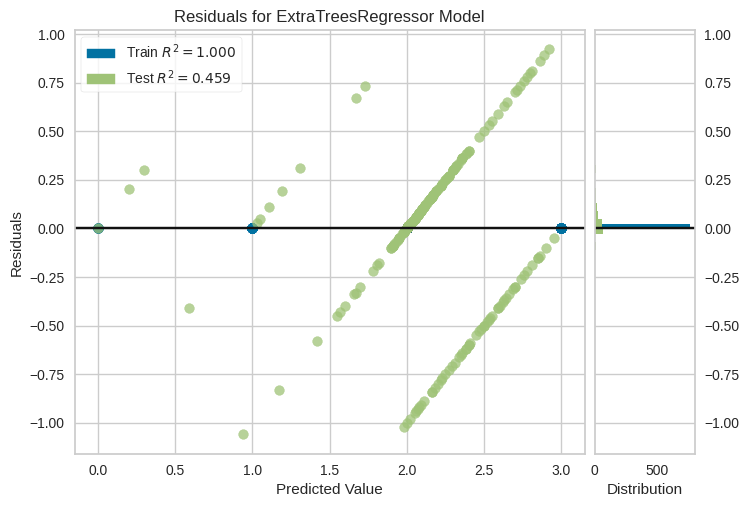

In [76]:
plot_model(best, plot = 'residuals')

In [80]:
# plot_model(best, plot='auc')

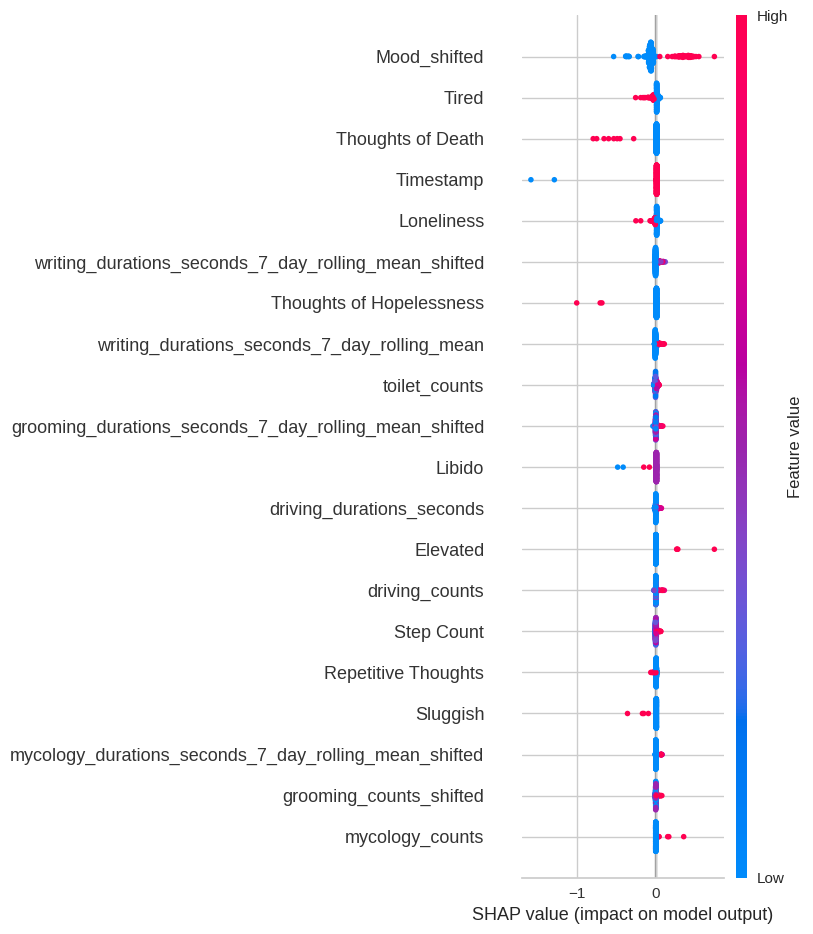

In [78]:
interpret_model(best)

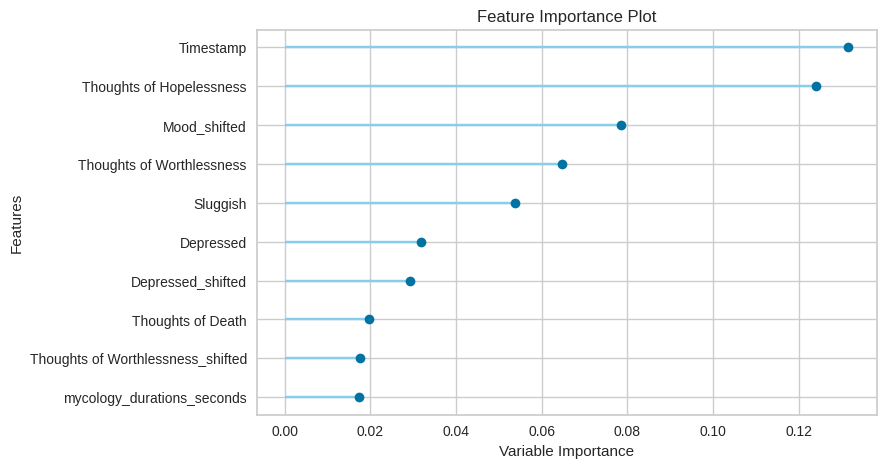

In [73]:
plot_model(best, plot='feature')

# Time Series

In [54]:
from pycaret.time_series import *
metric = "mape"
exclude = ["naive", "snaive"]
fig_kwargs={'renderer':'browser', 
            # "height":500, 
            # "width":1000
           }

In [64]:
from pycaret.utils import version
version()

'3.0.0.rc4'

In [55]:
df2

Step Count  Resting Heart Rate            Timestamp  Mood  Pain  \
Date                                                                          
2020-01-01        1041                56.0  2020-01-01 09:05:41   1.0   0.0   
2020-01-02         321                58.0  2020-01-02 23:59:59   1.0   0.0   
2020-01-03        1659                57.0  2020-01-03 23:47:21   2.0   0.0   
2020-01-04        8407                58.0  2020-01-04 14:35:28   1.0   2.0   
2020-01-05        4520                57.0  2020-01-05 19:08:20   2.0   2.0   
...                ...                 ...                  ...   ...   ...   
2022-12-27         519                50.0  2022-12-27 19:03:11   2.0   0.0   
2022-12-28        4961                50.0  2022-12-28 18:13:54   2.0   0.0   
2022-12-29        3453                51.0  2022-12-29 19:02:43   2.0   0.0   
2022-12-30        9216                51.0  2022-12-30 18:37:23   2.0   0.0   
2022-12-31       17737                51.0  2022-12-31 21:14:32   2.0   0.0   

            Tired  Sick  Anxiousness  Depressed  Suicidal  Self-Harm  \
Date                                                                   
2020-01-01    0.0   0.0          0.0        0.0       0.0        0.0   
2020-01-02    0.0   0.0          0.0        0.0       0.0        0.0   
2020-01-03    0.0   0.0          0.0        0.0       0.0        0.0   
2020-01-04    1.0   0.0          0.0        0.0       0.0        1.0   
2020-01-05    0.0   0.0          0.0        0.0       0.0        0.0   
...           ...   ...          ...        ...       ...        ...   
2022-12-27    0.0   0.0          0.0        0.0       0.0        0.0   
2022-12-28    0.0   0.0          0.0        0.0       0.0        0.0   
2022-12-29    0.0   0.0          0.0        0.0       0.0        0.0   
2022-12-30    0.0   0.0          0.0        0.0       0.0        0.0   
2022-12-31    0.0   0.0          0.0        0.0       0.0        0.0   

            Thoughts of Death  Repetitive Thoughts  Thoughts of Worthlessness  \
Date                                                                            
2020-01-01                0.0                  0.0                        0.0   
2020-01-02                0.0                  0.0                        0.0   
2020-01-03                0.0                  0.0                        0.0   
2020-01-04                0.0                  0.0                        0.0   
2020-01-05                0.0                  0.0                        0.0   
...                       ...                  ...                        ...   
2022-12-27                0.0                  0.0                        0.0   
2022-12-28                0.0                  0.0                        0.0   
2022-12-29                0.0                  0.0                        0.0   
2022-12-30                0.0                  0.0                        0.0   
2022-12-31                0.0                  0.0                        0.0   

            Thoughts of Hopelessness  Brain Sludge  Sluggish  Restless  \
Date                                                                     
2020-01-01                       0.0           0.0       0.0       0.0   
2020-01-02                       0.0           0.0       0.0       0.0   
2020-01-03                       0.0           0.0       0.0       0.0   
2020-01-04                       0.0           0.0       0.0       1.0   
2020-01-05                       0.0           0.0       0.0       1.0   
...                              ...           ...       ...       ...   
2022-12-27                       0.0           0.0       0.0       0.0   
2022-12-28                       0.0           0.0       0.0       0.0   
2022-12-29                       0.0           0.0       0.0       0.0   
2022-12-30                       0.0           0.0       0.0       0.0   
2022-12-31                       0.0           0.0       0.0       0.0   

            Existential Crisis

In [65]:
s = setup(data=df2, target='Mood', fold=5, fh=7, session_id=123, fold_strategy='sliding', ignore_features=['Timestamp'], enforce_exogenous=False) # 'sliding', 'rolling'

TypeError: X must be either None, or in an sktime compatible format, of scitype Series, Panel or Hierarchical, for instance a pandas.DataFrame with sktime compatible time indices, or with MultiIndex and last(-1) level an sktime compatible time index. See the forecasting tutorial examples/01_forecasting.ipynb, or the data format tutorial examples/AA_datatypes_and_datasets.ipynbIf you think X is already in an sktime supported input format, run sktime.datatypes.check_raise(X, mtype) to diagnose the error, where mtype is the string of the type specification you want for X. Possible mtype specification strings are as follows. "For Hierarchical scitype: ['pd_multiindex_hier']. 

In [61]:
check_stats()

Test   Test Name         Data             Property  \
0        Summary  Statistics  Transformed               Length   
1        Summary  Statistics  Transformed     # Missing Values   
2        Summary  Statistics  Transformed                 Mean   
3        Summary  Statistics  Transformed               Median   
4        Summary  Statistics  Transformed   Standard Deviation   
5        Summary  Statistics  Transformed             Variance   
6        Summary  Statistics  Transformed             Kurtosis   
7        Summary  Statistics  Transformed             Skewness   
8        Summary  Statistics  Transformed    # Distinct Values   
9    White Noise   Ljung-Box  Transformed       Test Statictic   
10   White Noise   Ljung-Box  Transformed       Test Statictic   
11   White Noise   Ljung-Box  Transformed              p-value   
12   White Noise   Ljung-Box  Transformed              p-value   
13   White Noise   Ljung-Box  Transformed          White Noise   
14   White Noise   Ljung-Box  Transformed          White Noise   
15  Stationarity         ADF  Transformed         Stationarity   
16  Stationarity         ADF  Transformed              p-value   
17  Stationarity         ADF  Transformed       Test Statistic   
18  Stationarity         ADF  Transformed    Critical Value 1%   
19  Stationarity         ADF  Transformed    Critical Value 5%   
20  Stationarity         ADF  Transformed   Critical Value 10%   
21  Stationarity        KPSS  Transformed   Trend Stationarity   
22  Stationarity        KPSS  Transformed              p-value   
23  Stationarity        KPSS  Transformed       Test Statistic   
24  Stationarity        KPSS  Transformed   Critical Value 10%   
25  Stationarity        KPSS  Transformed    Critical Value 5%   
26  Stationarity        KPSS  Transformed  Critical Value 2.5%   
27  Stationarity        KPSS  Transformed    Critical Value 1%   
28     Normality     Shapiro  Transformed            Normality   
29     Normality     Shapiro  Transformed              p-value   

                     Setting       Value  
0                                 1096.0  
1                                    0.0  
2                               2.118613  
3                                    2.0  
4                               0.482176  
5                               0.232493  
6                               3.429046  
7                              -0.182967  
8                                    4.0  
9   {'alpha': 0.05, 'K': 24}  840.952428  
10  {'alpha': 0.05, 'K': 48}  960.032968  
11  {'alpha': 0.05, 'K': 24}         0.0  
12  {'alpha': 0.05, 'K': 48}         0.0  
13  {'alpha': 0.05, 'K': 24}       False  
14  {'alpha': 0.05, 'K': 48}       False  
15           {'alpha': 0.05}        True  
16           {'alpha': 0.05}         0.0  
17           {'alpha': 0.05}   -9.712122  
18           {'alpha': 0.05}   -3.436358  
19           {'alpha': 0.05}   -2.864193  
20           {'alpha': 0.05}   -2.568182  
21           {'alpha': 0.05}        True  
22           {'alpha': 0.05}         0.1  
23           {'alpha': 0.05}    0.110007  
24           {'alpha': 0.05}       0.119  
25           {'alpha': 0.05}       0.146  
26           {'alpha': 0.05}       0.176  
27           {'alpha': 0.05}       0.216  
28           {'alpha': 0.05}       False  
29           {'alpha': 0.05}         0.0

In [57]:
best = compare_models(sort=metric, turbo=False, exclude=exclude)

RuntimeError: This function/method requires the users to run setup() first.
More info: https://pycaret.gitbook.io/docs/get-started/quickstart

In [89]:
plot_model(best, plot = 'residuals')

ValueError: Estimator [] does not have the required fit() method.

In [ ]:
interpret_model(best)

In [ ]:
plot_model(best, plot='feature')

In [ ]:
plot_model(best, plot='auc')

In [ ]:
plot_model(best, plot = 'diagnostics')